# Exploratory Data Analysis 

## First off, let's import some necessary libraries of Python to elaborate data collected

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn-dark-palette')
%matplotlib inline

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

### Importing comma separated file (CSV) which is the database of the project

In [2]:
df = pd.read_csv("02.CMM_Threads_Points_Analysis-Data_Science.csv")

### Renaming some columns to avoid registered key words by Jupyter Notebook/Python

In [3]:
rename_dict = {'Tip_Dim-s': 'Tip_Dim', 'HIT#': 'HIT_NO', 'HOLE#_ISO_mm':'HOLE_ID', 'TOUCH_TRIGGER/SCAN': "TT_SCAN_TL"}   # key→old name, value→new name
df.columns = [rename_dict.get(x, x) for x in df.columns]

### Going through the database we have

In [4]:
#Checking the head of the file
df.head()

Manufacturer                        CMM                 Probe  \
0  Technimetal Ltd. China  Hexagon_Global Image 7107  Leitz,  HH-AS8-T2.5    
1  Technimetal Ltd. China  Hexagon_Global Image 7107  Leitz,  HH-AS8-T2.5    
2  Technimetal Ltd. China  Hexagon_Global Image 7107  Leitz,  HH-AS8-T2.5    
3  Technimetal Ltd. China  Hexagon_Global Image 7107  Leitz,  HH-AS8-T2.5    
4  Technimetal Ltd. China  Hexagon_Global Image 7107  Leitz,  HH-AS8-T2.5    

       Tip_Dim         Software               HIT_NO  HOLE_ID  TT_SCAN_TL DIR  \
0  2mm_by_30mm  PC-DMIS_2019MR1  2.0-30_TH-1_1_TT_CW        1         1.1  CW   
1  2mm_by_30mm  PC-DMIS_2019MR1  2.0-30_TH-1_2_TT_CW        1         1.1  CW   
2  2mm_by_30mm  PC-DMIS_2019MR1  2.0-30_TH-1_3_TT_CW        1         1.1  CW   
3  2mm_by_30mm  PC-DMIS_2019MR1  2.0-30_TH-1_4_TT_CW        1         1.1  CW   
4  2mm_by_30mm  PC-DMIS_2019MR1  2.0-30_TH-1_5_TT_CW        1         1.1  CW   

   ST_ANG  ...  Theo_X  Theo_Y  Theo_Z         i         j    k  Act_D  \
0     720  ... -30.860 -16.600  -2.516  0.000000  1.000000  0.0  2.544   
1     720  ... -32.079 -15.072  -2.659  0.974928 -0.222521  0.0  2.544   
2     720  ... -30.318 -14.224  -2.802 -0.433884 -0.900969  0.0  2.544   
3     720  ... -29.883 -16.129  -2.945 -0.781832  0.623490  0.0  2.544   
4     720  ... -31.837 -16.129  -3.087  0.781832  0.623490  0.0  2.544   

    Act_X   Act_Y  Act_Z  
0 -30.856 -16.607 -2.517  
1 -32.100 -15.071 -2.660  
2 -30.302 -14.168 -2.803  
3 -29.883 -16.134 -2.948  
4 -31.836 -16.121 -3.089  

[5 rows x 33 columns]

In [5]:
#Checking the tail of the file
df.tail()

Manufacturer                        CMM  \
26093  Technimetal Ltd. China  Hexagon_Global Image 7107   
26094  Technimetal Ltd. China  Hexagon_Global Image 7107   
26095  Technimetal Ltd. China  Hexagon_Global Image 7107   
26096  Technimetal Ltd. China  Hexagon_Global Image 7107   
26097  Technimetal Ltd. China  Hexagon_Global Image 7107   

                      Probe        Tip_Dim         Software  \
26093  Leitz,  HH-AS8-T2.5   1.5mm_by_30mm  PC-DMIS_2019MR1   
26094  Leitz,  HH-AS8-T2.5   1.5mm_by_30mm  PC-DMIS_2019MR1   
26095  Leitz,  HH-AS8-T2.5   1.5mm_by_30mm  PC-DMIS_2019MR1   
26096  Leitz,  HH-AS8-T2.5   1.5mm_by_30mm  PC-DMIS_2019MR1   
26097  Leitz,  HH-AS8-T2.5   1.5mm_by_30mm  PC-DMIS_2019MR1   

                     HIT_NO  HOLE_ID  TT_SCAN_TL  DIR  ST_ANG  ...   Theo_X  \
26093  1.5-30_TH-4_4_TL_CCW        4         3.1  CCW       0  ... -129.246   
26094  1.5-30_TH-4_5_TL_CCW        4         3.1  CCW       0  ... -129.768   
26095  1.5-30_TH-4_6_TL_CCW        4         3.1  CCW       0  ... -128.645   
26096  1.5-30_TH-4_7_TL_CCW        4         3.1  CCW       0  ... -126.789   
26097  1.5-30_TH-4_8_TL_CCW        4         3.1  CCW       0  ... -124.848   

        Theo_Y  Theo_Z         i         j    k  Act_D    Act_X    Act_Y  \
26093 -213.278  19.818 -0.826055  0.563590  0.0  6.353 -129.209 -213.285   
26094 -215.494  19.819 -0.991062 -0.133404  0.0  6.353 -129.686 -215.475   
26095 -217.518  19.819 -0.637310 -0.770608  0.0  6.353 -128.580 -217.450   
26096 -218.259  19.817 -0.053008 -0.998594  0.0  6.353 -126.768 -218.180   
26097 -217.717  19.816  0.556427 -0.830897  0.0  6.353 -124.840 -217.696   

        Act_Z  
26093  19.820  
26094  19.820  
26095  19.819  
26096  19.817  
26097  19.817  

[5 rows x 33 columns]

From above given head and tail 5 representative rows of the database, one may observe the part manufacturer, used machine, necessary probe type and the software package. Tip_Dim-s columns shows 3 used tips with different tips sphere size, total tip length and the extention to see the difference and accuracy among them.

Hits column depicts order of the points to make one feature.

HOLE#_ISO_mm columns has two information: type of the featurein the software used to collect the data and the thread type which is in this case M3x0.5, ISO standard based one. 

### Evaluating what kind of data we are dealing with

In [6]:
#let's see data type we are dealing with:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26098 entries, 0 to 26097
Data columns (total 33 columns):
Manufacturer    26098 non-null object
CMM             26098 non-null object
Probe           26098 non-null object
Tip_Dim         26098 non-null object
Software        26098 non-null object
HIT_NO          26098 non-null object
HOLE_ID         26098 non-null int64
TT_SCAN_TL      26098 non-null float64
DIR             26098 non-null object
ST_ANG          26098 non-null int64
END_ANG         26098 non-null int64
NUMHITS         26098 non-null int64
DEPTH           26098 non-null float64
PITCH           26098 non-null float64
OUTER/INNER     26098 non-null object
ALGOR           26098 non-null object
Feat_X          26098 non-null float64
Feat_Y          26098 non-null float64
Feat_Z          26098 non-null float64
Feat_i          26098 non-null int64
Feat_j          26098 non-null int64
Feat_k          26098 non-null int64
Theo_D          26098 non-null float64
Theo_X          2

Ass all the columns have the same number of data or 26098 rows, we are not dealing with missing data. 

Additionally, looks like the all axes related dimensions are given in floats and integers. Let's convert all of them to the same data type in case we have to work with their combinations further.

In [7]:
df['Feat_i'] = df['Feat_i'].astype(float)
df['Feat_j'] = df['Feat_j'].astype(float)
df['Feat_k'] = df['Feat_k'].astype(float)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26098 entries, 0 to 26097
Data columns (total 33 columns):
Manufacturer    26098 non-null object
CMM             26098 non-null object
Probe           26098 non-null object
Tip_Dim         26098 non-null object
Software        26098 non-null object
HIT_NO          26098 non-null object
HOLE_ID         26098 non-null int64
TT_SCAN_TL      26098 non-null float64
DIR             26098 non-null object
ST_ANG          26098 non-null int64
END_ANG         26098 non-null int64
NUMHITS         26098 non-null int64
DEPTH           26098 non-null float64
PITCH           26098 non-null float64
OUTER/INNER     26098 non-null object
ALGOR           26098 non-null object
Feat_X          26098 non-null float64
Feat_Y          26098 non-null float64
Feat_Z          26098 non-null float64
Feat_i          26098 non-null float64
Feat_j          26098 non-null float64
Feat_k          26098 non-null float64
Theo_D          26098 non-null float64
Theo_X     

In [9]:
pd.isnull(df.iloc[1,0])

False

Just to make sure we are not dealing with missing or null values, we are going to check that below:

In [10]:
#Once again, check for dataframe columns and rows:
df.shape

(26098, 33)

### Generating descriptive statistics for the given database

All set now with axes data and let's observe and generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values:

In [11]:
df.describe()

HOLE_ID    TT_SCAN_TL       ST_ANG       END_ANG       NUMHITS  \
count  26098.000000  26098.000000  26098.00000  26098.000000  26098.000000   
mean       2.500920      1.931711    572.69216   -143.335121     73.843360   
std        1.118021      0.383836    179.68281    178.914409     34.638987   
min        1.000000      1.100000      0.00000   -360.000000      7.000000   
25%        2.000000      2.100000    360.00000   -360.000000     50.000000   
50%        2.500000      2.100000    720.00000      0.000000    100.000000   
75%        4.000000      2.100000    720.00000      0.000000    100.000000   
max        4.000000      3.100000    720.00000    360.000000    100.000000   

              DEPTH         PITCH        Feat_X        Feat_Y        Feat_Z  \
count  26098.000000  26098.000000  26098.000000  26098.000000  26098.000000   
mean      -3.969345      0.521552    -87.328918    -94.993192     -6.403194   
std        0.241190      0.354702     41.119692     84.638283      1.593223   
min       -3.984000      0.500000   -126.620000   -215.070000     -6.500000   
25%       -3.984000      0.500000   -126.620000   -215.070000     -6.500000   
50%       -3.984000      0.500000    -95.885000    -74.705000     -6.500000   
75%       -3.984000      0.500000    -65.150000    -15.350000     -6.500000   
max        0.000000      6.359000    -30.854000    -15.345000     19.817000   

       ...        Theo_X        Theo_Y        Theo_Z             i  \
count  ...  26098.000000  26098.000000  26098.000000  26098.000000   
mean   ...    -87.327064    -94.980168     -2.102858     -0.002285   
std    ...     41.129220     84.643932      1.414352      0.712651   
min    ...   -129.768000   -218.259000     -3.506000     -1.000000   
25%    ...   -126.620000   -213.820000     -2.405000     -0.711361   
50%    ...    -95.880500    -74.709000     -2.114000      0.000000   
75%    ...    -63.900000    -15.334000     -1.816000      0.710323   
max    ...    -27.682000    -12.168000     20.015000      1.000000   

                  j             k         Act_D         Act_X         Act_Y  \
count  26098.000000  26098.000000  26098.000000  26098.000000  26098.000000   
mean      -0.010897      0.000006      2.547760    -87.304684    -94.941790   
std        0.701457      0.000569      0.231351     41.121472     84.628428   
min       -1.000000     -0.029191      2.520000   -129.703000   -218.188000   
25%       -0.721333      0.000000      2.530000   -126.593750   -213.703000   
50%       -0.012601      0.000000      2.535000    -95.839000    -74.684500   
75%        0.687004      0.000000      2.537000    -63.837250    -15.308000   
max        1.000000      0.026383      6.359000    -27.677000    -12.170000   

              Act_Z  
count  26098.000000  
mean      -2.102762  
std        1.414461  
min       -3.510000  
25%       -2.405000  
50%       -2.114000  
75%       -1.816000  
max       19.998000  

[8 rows x 24 columns]

- In terms of the first two columns, we are dealing only with 720 degrees to 0 degree and 360 to -360 degrees making helical motion following the pitch path given in PITCH column which equals to 0.5 mm. So all the 3 columns are not of statistical interest due to nothin going on there. 

- In NUMHITS column we have 3 method cases as described in the introduction section of the projects: touch trigger (TT), scanning (Adaptive_Scaning) and thread locating (TL) in order to collect points. 

- In the first case, points are collected as touching to the feature making the speed=0 and collecting points one by one hence making number of point per feature. Points represented as 7, 10, 20, 50 and 100 per feature while travelling clockwise and counter clockwise in column DIR.

- Unlike to the first case, in scanning we are dealing with point generation in the fly dealing with point density or number points per mm step. Points represented as 7, 10, 20, 50 and 100 per mm while travelling clockwise and counter clockwise in column DIR.

- Last method was actually meant to be the verification case for former two methods as it is commonly accepted method in manufacturing. The idea is to insert a threaded plug into the threaded hole while having really precise diameter to take reading from in order to locate the center of the theraded hole. Points here were represented as 8 per plug or feature while travelling clockwise or counter clockwise in column DIR. 

- The rest of the columns are theoretical, actual and targeted axes values meaning, theoreticals were collected from the CAD (computer aided design model) of the given part per coordinate measuring machine (CMM)'s operation principle. Actuals are the values of the real physical part made by CNC (computer numerical controlled) machine. While bonding CAD and physical model, CMM estimates/predicts and expects coordinates of the physical part while creating them as target values along rspective axes. 

### Overall points within tips categorized by measuring methods: TT, Scan, TL

In [12]:
# 2mm tip, TT
mask_tt_pnts =(df.Tip_Dim == '1.5mm_by_30mm')
df[mask_tt_pnts]

Manufacturer                        CMM  \
16105  Technimetal Ltd. China  Hexagon_Global Image 7107   
16106  Technimetal Ltd. China  Hexagon_Global Image 7107   
16107  Technimetal Ltd. China  Hexagon_Global Image 7107   
16108  Technimetal Ltd. China  Hexagon_Global Image 7107   
16109  Technimetal Ltd. China  Hexagon_Global Image 7107   
16110  Technimetal Ltd. China  Hexagon_Global Image 7107   
16111  Technimetal Ltd. China  Hexagon_Global Image 7107   
16112  Technimetal Ltd. China  Hexagon_Global Image 7107   
16113  Technimetal Ltd. China  Hexagon_Global Image 7107   
16114  Technimetal Ltd. China  Hexagon_Global Image 7107   
16115  Technimetal Ltd. China  Hexagon_Global Image 7107   
16116  Technimetal Ltd. China  Hexagon_Global Image 7107   
16117  Technimetal Ltd. China  Hexagon_Global Image 7107   
16118  Technimetal Ltd. China  Hexagon_Global Image 7107   
16119  Technimetal Ltd. China  Hexagon_Global Image 7107   
16120  Technimetal Ltd. China  Hexagon_Global Image 7107   
16121  Technimetal Ltd. China  Hexagon_Global Image 7107   
16122  Technimetal Ltd. China  Hexagon_Global Image 7107   
16123  Technimetal Ltd. China  Hexagon_Global Image 7107   
16124  Technimetal Ltd. China  Hexagon_Global Image 7107   
16125  Technimetal Ltd. China  Hexagon_Global Image 7107   
16126  Technimetal Ltd. China  Hexagon_Global Image 7107   
16127  Technimetal Ltd. China  Hexagon_Global Image 7107   
16128  Technimetal Ltd. China  Hexagon_Global Image 7107   
16129  Technimetal Ltd. China  Hexagon_Global Image 7107   
16130  Technimetal Ltd. China  Hexagon_Global Image 7107   
16131  Technimetal Ltd. China  Hexagon_Global Image 7107   
16132  Technimetal Ltd. China  Hexagon_Global Image 7107   
16133  Technimetal Ltd. China  Hexagon_Global Image 7107   
16134  Technimetal Ltd. China  Hexagon_Global Image 7107   
...                       ...                        ...   
26068  Technimetal Ltd. China  Hexagon_Global Image 7107   
26069  Technimetal Ltd. China  Hexagon_Global Image 7107   
26070  Technimetal Ltd. China  Hexagon_Global Image 7107   
26071  Technimetal Ltd. China  Hexagon_Global Image 7107   
26072  Technimetal Ltd. China  Hexagon_Global Image 7107   
26073  Technimetal Ltd. China  Hexagon_Global Image 7107   
26074  Technimetal Ltd. China  Hexagon_Global Image 7107   
26075  Technimetal Ltd. China  Hexagon_Global Image 7107   
26076  Technimetal Ltd. China  Hexagon_Global Image 7107   
26077  Technimetal Ltd. China  Hexagon_Global Image 7107   
26078  Technimetal Ltd. China  Hexagon_Global Image 7107   
26079  Technimetal Ltd. China  Hexagon_Global Image 7107   
26080  Technimetal Ltd. China  Hexagon_Global Image 7107   
26081  Technimetal Ltd. China  Hexagon_Global Image 7107   
26082  Technimetal Ltd. China  Hexagon_Global Image 7107   
26083  Technimetal Ltd. China  Hexagon_Global Image 7107   
26084  Technimetal Ltd. China  Hexagon_Global Image 7107   
26085  Technimetal Ltd. China  Hexagon_Global Image 7107   
26086  Technimetal Ltd. China  Hexagon_Global Image 7107   
26087  Technimetal Ltd. China  Hexagon_Global Image 7107   
26088  Technimetal Ltd. China  Hexagon_Global Image 7107   
26089  Technimetal Ltd. China  Hexagon_Global Image 7107   
26090  Technimetal Ltd. China  Hexagon_Global Image 7107   
26091  Technimetal Ltd. China  Hexagon_Global Image 7107   
26092  Technimetal Ltd. China  Hexagon_Global Image 7107   
26093  Technimetal Ltd. China  Hexagon_Global Image 7107   
26094  Technimetal Ltd. China  Hexagon_Global Image 7107   
26095  Technimetal Ltd. China  Hexagon_Global Image 7107   
26096  Technimetal Ltd. China  Hexagon_Global Image 7107   
26097  Technimetal Ltd. China  Hexagon_Global Image 7107   

                      Probe        Tip_Dim         Software  \
16105  Leitz,  HH-AS8-T2.5   1.5mm_by_30mm  PC-DMIS_2019MR1   
16106  Leitz,  HH-AS8-T2.5   1.5mm_by_30mm  PC-DMIS_2019MR1   
16107  Leitz,  HH-AS8-T2.5   1.5mm_by_30mm  PC-DMIS_2019MR1   
16108  Leitz,  HH-AS8-T2.5   1.5mm_by_30mm  

In [19]:
# 2mm tip, TT-1.1, Scanning-2.1, TL-3.1
mask_tt_pnts =(df.TT_SCAN_TL == '2.1') & (df.Tip_Dim == '1.5mm_by_30mm')
df[mask_tt_pnts]

Empty DataFrame
Columns: [Manufacturer, CMM, Probe, Tip_Dim, Software, HIT_NO, HOLE_ID, TT_SCAN_TL, DIR, ST_ANG, END_ANG, NUMHITS, DEPTH, PITCH, OUTER/INNER, ALGOR, Feat_X, Feat_Y, Feat_Z, Feat_i, Feat_j, Feat_k, Theo_D, Theo_X, Theo_Y, Theo_Z, i, j, k, Act_D, Act_X, Act_Y, Act_Z]
Index: []

[0 rows x 33 columns]

In [20]:
mask_tt_pnts =(df.Tip_Dim == '1.5mm_by_30mm') & (df.TT_SCAN_TL == 'TOUCH_TRIGGER') 
df[mask_tt_pnts]

Empty DataFrame
Columns: [Manufacturer, CMM, Probe, Tip_Dim, Software, HIT_NO, HOLE_ID, TT_SCAN_TL, DIR, ST_ANG, END_ANG, NUMHITS, DEPTH, PITCH, OUTER/INNER, ALGOR, Feat_X, Feat_Y, Feat_Z, Feat_i, Feat_j, Feat_k, Theo_D, Theo_X, Theo_Y, Theo_Z, i, j, k, Act_D, Act_X, Act_Y, Act_Z]
Index: []

[0 rows x 33 columns]

In [21]:
mask_tl_pnts =(df.Tip_Dim == '1.5mm_by_30mm') & (df.TT_SCAN_TL == 'TOUCH_TRIGGER') & (df.ALGOR == 'LEAST_SQR') 
df[mask_tl_pnts]

Empty DataFrame
Columns: [Manufacturer, CMM, Probe, Tip_Dim, Software, HIT_NO, HOLE_ID, TT_SCAN_TL, DIR, ST_ANG, END_ANG, NUMHITS, DEPTH, PITCH, OUTER/INNER, ALGOR, Feat_X, Feat_Y, Feat_Z, Feat_i, Feat_j, Feat_k, Theo_D, Theo_X, Theo_Y, Theo_Z, i, j, k, Act_D, Act_X, Act_Y, Act_Z]
Index: []

[0 rows x 33 columns]

We can draw now the following conclusion:

For 2 mm tip we have total of 6107 points from which:
- Touch Trigger points of the order of: 1496
- Scanning points of the order of: 4579
- Thread Locator points of the order of: 32

For 1.5 mm tip with 20 mm ext. we have total of 9998 points from which:
- Touch Trigger points of the order of: 1528
- Scanning points of the order of: 8470
- Thread Locator points of the order of: 32

For 1.5 mm tip with 30 mm ext. we have total of 9993 points from which:
- Touch Trigger points of the order of: 1528
- Scanning points of the order of: 8465
- Thread Locator points of the order of: 32

### Droping off some unnecessary columns

In [22]:
#Dropping off unnecessary (introductory or informative) columns, namely:
df.drop(['Manufacturer', 'CMM', 'Probe', 'Software'], axis=1, inplace=True)

In [23]:
#Also, columns Depth, Pitch, Aldorithm, and OUTER/INNER are also general and the same for all the database, so we may hide them too:
df.drop(['DEPTH', 'PITCH', 'ALGOR', 'OUTER/INNER'], axis=1, inplace=True)

In [24]:
df

Tip_Dim                  HIT_NO  HOLE_ID  TT_SCAN_TL  DIR  \
0        2mm_by_30mm     2.0-30_TH-1_1_TT_CW        1         1.1   CW   
1        2mm_by_30mm     2.0-30_TH-1_2_TT_CW        1         1.1   CW   
2        2mm_by_30mm     2.0-30_TH-1_3_TT_CW        1         1.1   CW   
3        2mm_by_30mm     2.0-30_TH-1_4_TT_CW        1         1.1   CW   
4        2mm_by_30mm     2.0-30_TH-1_5_TT_CW        1         1.1   CW   
5        2mm_by_30mm     2.0-30_TH-1_6_TT_CW        1         1.1   CW   
6        2mm_by_30mm     2.0-30_TH-1_7_TT_CW        1         1.1   CW   
7        2mm_by_30mm     2.0-30_TH-1_1_SC_CW        1         2.1   CW   
8        2mm_by_30mm     2.0-30_TH-1_2_SC_CW        1         2.1   CW   
9        2mm_by_30mm     2.0-30_TH-1_3_SC_CW        1         2.1   CW   
10       2mm_by_30mm     2.0-30_TH-1_4_SC_CW        1         2.1   CW   
11       2mm_by_30mm     2.0-30_TH-1_5_SC_CW        1         2.1   CW   
12       2mm_by_30mm     2.0-30_TH-1_6_SC_CW        1         2.1   CW   
13       2mm_by_30mm     2.0-30_TH-1_7_SC_CW        1         2.1   CW   
14       2mm_by_30mm     2.0-30_TH-1_8_SC_CW        1         2.1   CW   
15       2mm_by_30mm     2.0-30_TH-1_9_SC_CW        1         2.1   CW   
16       2mm_by_30mm    2.0-30_TH-1_10_SC_CW        1         2.1   CW   
17       2mm_by_30mm    2.0-30_TH-1_11_SC_CW        1         2.1   CW   
18       2mm_by_30mm    2.0-30_TH-1_12_SC_CW        1         2.1   CW   
19       2mm_by_30mm    2.0-30_TH-1_13_SC_CW        1         2.1   CW   
20       2mm_by_30mm    2.0-30_TH-1_14_SC_CW        1         2.1   CW   
21       2mm_by_30mm    2.0-30_TH-1_15_SC_CW        1         2.1   CW   
22       2mm_by_30mm    2.0-30_TH-1_16_SC_CW        1         2.1   CW   
23       2mm_by_30mm    2.0-30_TH-1_17_SC_CW        1         2.1   CW   
24       2mm_by_30mm    2.0-30_TH-1_18_SC_CW        1         2.1   CW   
25       2mm_by_30mm    2.0-30_TH-1_19_SC_CW        1         2.1   CW   
26       2mm_by_30mm    2.0-30_TH-1_20_SC_CW        1         2.1   CW   
27       2mm_by_30mm    2.0-30_TH-1_1_TT_CCW        1         1.1  CCW   
28       2mm_by_30mm    2.0-30_TH-1_2_TT_CCW        1         1.1  CCW   
29       2mm_by_30mm    2.0-30_TH-1_3_TT_CCW        1         1.1  CCW   
...              ...                     ...      ...         ...  ...   
26068  1.5mm_by_30mm  1.5-30_TH-4_644_SC_CCW        4         2.1  CCW   
26069  1.5mm_by_30mm  1.5-30_TH-4_645_SC_CCW        4         2.1  CCW   
26070  1.5mm_by_30mm  1.5-30_TH-4_646_SC_CCW        4         2.1  CCW   
26071  1.5mm_by_30mm  1.5-30_TH-4_647_SC_CCW        4         2.1  CCW   
26072  1.5mm_by_30mm  1.5-30_TH-4_648_SC_CCW        4         2.1  CCW   
26073  1.5mm_by_30mm  1.5-30_TH-4_649_SC_CCW        4         2.1  CCW   
26074  1.5mm_by_30mm  1.5-30_TH-4_650_SC_CCW        4         2.1  CCW   
26075  1.5mm_by_30mm  1.5-30_TH-4_651_SC_CCW        4         2.1  CCW   
26076  1.5mm_by_30mm  1.5-30_TH-4_652_SC_CCW        4         2.1  CCW   
26077  1.5mm_by_30mm  1.5-30_TH-4_653_SC_CCW        4         2.1  CCW   
26078  1.5mm_by_30mm  1.5-30_TH-4_654_SC_CCW        4         2.1  CCW   
26079  1.5mm_by_30mm  1.5-30_TH-4_655_SC_CCW        4         2.1  CCW   
26080  1.5mm_by_30mm  1.5-30_TH-4_656_SC_CCW        4         2.1  CCW   
26081  1.5mm_by_30mm  1.5-30_TH-4_657_SC_CCW        4         2.1  CCW   
26082  1.5mm_by_30mm  1.5-30_TH-4_658_SC_CCW        4         2.1  CCW   
26083  1.5mm_by_30mm  1.5-30_TH-4_659_SC_CCW        4         2.1  CCW   
26084  1.5mm_by_30mm  1.5-30_TH-4_660_SC_CCW        4         2.1  CCW   
26085  1.5mm_by_30mm  1.5-30_TH-4_661_SC_CCW        4         2.1  CCW   
26086  1.5mm_by_30mm  1.5-30_TH-4_662_SC_CCW        4         2.1  CCW   
26087  1.5mm_by_30mm  1.5-30_TH-4_663_SC_CCW        4         2.1  CCW   
26088  1.5mm_by_30mm  1.5-30_TH-4_664_SC_CCW        4         2.1  CCW   
26089  1.5mm_by_30mm  1.5-30_TH-4_665_SC_CCW        4         2.1  CCW   
26090  1.5mm_by_3

## Creating extra columns based on theoreticals and actuals

In [25]:
#  create an attached to the dataframe column with an index, Axes:
df['Dev_X'] = df.apply(lambda col: col.Theo_X - col.Act_X, axis=1)
df['Dev_Y'] = df.apply(lambda col: col.Theo_Y - col.Act_Y, axis=1)
df['Dev_Z'] = df.apply(lambda col: col.Theo_Z - col.Act_Z, axis=1)

In [26]:
# diameters:
df['Dev_D'] = df.apply(lambda col: col.Theo_D - col.Act_D, axis=1)

In [27]:
df

Tip_Dim                  HIT_NO  HOLE_ID  TT_SCAN_TL  DIR  \
0        2mm_by_30mm     2.0-30_TH-1_1_TT_CW        1         1.1   CW   
1        2mm_by_30mm     2.0-30_TH-1_2_TT_CW        1         1.1   CW   
2        2mm_by_30mm     2.0-30_TH-1_3_TT_CW        1         1.1   CW   
3        2mm_by_30mm     2.0-30_TH-1_4_TT_CW        1         1.1   CW   
4        2mm_by_30mm     2.0-30_TH-1_5_TT_CW        1         1.1   CW   
5        2mm_by_30mm     2.0-30_TH-1_6_TT_CW        1         1.1   CW   
6        2mm_by_30mm     2.0-30_TH-1_7_TT_CW        1         1.1   CW   
7        2mm_by_30mm     2.0-30_TH-1_1_SC_CW        1         2.1   CW   
8        2mm_by_30mm     2.0-30_TH-1_2_SC_CW        1         2.1   CW   
9        2mm_by_30mm     2.0-30_TH-1_3_SC_CW        1         2.1   CW   
10       2mm_by_30mm     2.0-30_TH-1_4_SC_CW        1         2.1   CW   
11       2mm_by_30mm     2.0-30_TH-1_5_SC_CW        1         2.1   CW   
12       2mm_by_30mm     2.0-30_TH-1_6_SC_CW        1         2.1   CW   
13       2mm_by_30mm     2.0-30_TH-1_7_SC_CW        1         2.1   CW   
14       2mm_by_30mm     2.0-30_TH-1_8_SC_CW        1         2.1   CW   
15       2mm_by_30mm     2.0-30_TH-1_9_SC_CW        1         2.1   CW   
16       2mm_by_30mm    2.0-30_TH-1_10_SC_CW        1         2.1   CW   
17       2mm_by_30mm    2.0-30_TH-1_11_SC_CW        1         2.1   CW   
18       2mm_by_30mm    2.0-30_TH-1_12_SC_CW        1         2.1   CW   
19       2mm_by_30mm    2.0-30_TH-1_13_SC_CW        1         2.1   CW   
20       2mm_by_30mm    2.0-30_TH-1_14_SC_CW        1         2.1   CW   
21       2mm_by_30mm    2.0-30_TH-1_15_SC_CW        1         2.1   CW   
22       2mm_by_30mm    2.0-30_TH-1_16_SC_CW        1         2.1   CW   
23       2mm_by_30mm    2.0-30_TH-1_17_SC_CW        1         2.1   CW   
24       2mm_by_30mm    2.0-30_TH-1_18_SC_CW        1         2.1   CW   
25       2mm_by_30mm    2.0-30_TH-1_19_SC_CW        1         2.1   CW   
26       2mm_by_30mm    2.0-30_TH-1_20_SC_CW        1         2.1   CW   
27       2mm_by_30mm    2.0-30_TH-1_1_TT_CCW        1         1.1  CCW   
28       2mm_by_30mm    2.0-30_TH-1_2_TT_CCW        1         1.1  CCW   
29       2mm_by_30mm    2.0-30_TH-1_3_TT_CCW        1         1.1  CCW   
...              ...                     ...      ...         ...  ...   
26068  1.5mm_by_30mm  1.5-30_TH-4_644_SC_CCW        4         2.1  CCW   
26069  1.5mm_by_30mm  1.5-30_TH-4_645_SC_CCW        4         2.1  CCW   
26070  1.5mm_by_30mm  1.5-30_TH-4_646_SC_CCW        4         2.1  CCW   
26071  1.5mm_by_30mm  1.5-30_TH-4_647_SC_CCW        4         2.1  CCW   
26072  1.5mm_by_30mm  1.5-30_TH-4_648_SC_CCW        4         2.1  CCW   
26073  1.5mm_by_30mm  1.5-30_TH-4_649_SC_CCW        4         2.1  CCW   
26074  1.5mm_by_30mm  1.5-30_TH-4_650_SC_CCW        4         2.1  CCW   
26075  1.5mm_by_30mm  1.5-30_TH-4_651_SC_CCW        4         2.1  CCW   
26076  1.5mm_by_30mm  1.5-30_TH-4_652_SC_CCW        4         2.1  CCW   
26077  1.5mm_by_30mm  1.5-30_TH-4_653_SC_CCW        4         2.1  CCW   
26078  1.5mm_by_30mm  1.5-30_TH-4_654_SC_CCW        4         2.1  CCW   
26079  1.5mm_by_30mm  1.5-30_TH-4_655_SC_CCW        4         2.1  CCW   
26080  1.5mm_by_30mm  1.5-30_TH-4_656_SC_CCW        4         2.1  CCW   
26081  1.5mm_by_30mm  1.5-30_TH-4_657_SC_CCW        4         2.1  CCW   
26082  1.5mm_by_30mm  1.5-30_TH-4_658_SC_CCW        4         2.1  CCW   
26083  1.5mm_by_30mm  1.5-30_TH-4_659_SC_CCW        4         2.1  CCW   
26084  1.5mm_by_30mm  1.5-30_TH-4_660_SC_CCW        4         2.1  CCW   
26085  1.5mm_by_30mm  1.5-30_TH-4_661_SC_CCW        4         2.1  CCW   
26086  1.5mm_by_30mm  1.5-30_TH-4_662_SC_CCW        4         2.1  CCW   
26087  1.5mm_by_30mm  1.5-30_TH-4_663_SC_CCW        4         2.1  CCW   
26088  1.5mm_by_30mm  1.5-30_TH-4_664_SC_CCW        4         2.1  CCW   
26089  1.5mm_by_30mm  1.5-30_TH-4_665_SC_CCW        4         2.1  CCW   
26090  1.5mm_by_3

In [28]:
#Creating/writing new CSV file with the updated dataframe/database
df.to_csv(r'02_2.CMM_Threads_Points_Analysis-Data_Science.csv')
df

Tip_Dim                  HIT_NO  HOLE_ID  TT_SCAN_TL  DIR  \
0        2mm_by_30mm     2.0-30_TH-1_1_TT_CW        1         1.1   CW   
1        2mm_by_30mm     2.0-30_TH-1_2_TT_CW        1         1.1   CW   
2        2mm_by_30mm     2.0-30_TH-1_3_TT_CW        1         1.1   CW   
3        2mm_by_30mm     2.0-30_TH-1_4_TT_CW        1         1.1   CW   
4        2mm_by_30mm     2.0-30_TH-1_5_TT_CW        1         1.1   CW   
5        2mm_by_30mm     2.0-30_TH-1_6_TT_CW        1         1.1   CW   
6        2mm_by_30mm     2.0-30_TH-1_7_TT_CW        1         1.1   CW   
7        2mm_by_30mm     2.0-30_TH-1_1_SC_CW        1         2.1   CW   
8        2mm_by_30mm     2.0-30_TH-1_2_SC_CW        1         2.1   CW   
9        2mm_by_30mm     2.0-30_TH-1_3_SC_CW        1         2.1   CW   
10       2mm_by_30mm     2.0-30_TH-1_4_SC_CW        1         2.1   CW   
11       2mm_by_30mm     2.0-30_TH-1_5_SC_CW        1         2.1   CW   
12       2mm_by_30mm     2.0-30_TH-1_6_SC_CW        1         2.1   CW   
13       2mm_by_30mm     2.0-30_TH-1_7_SC_CW        1         2.1   CW   
14       2mm_by_30mm     2.0-30_TH-1_8_SC_CW        1         2.1   CW   
15       2mm_by_30mm     2.0-30_TH-1_9_SC_CW        1         2.1   CW   
16       2mm_by_30mm    2.0-30_TH-1_10_SC_CW        1         2.1   CW   
17       2mm_by_30mm    2.0-30_TH-1_11_SC_CW        1         2.1   CW   
18       2mm_by_30mm    2.0-30_TH-1_12_SC_CW        1         2.1   CW   
19       2mm_by_30mm    2.0-30_TH-1_13_SC_CW        1         2.1   CW   
20       2mm_by_30mm    2.0-30_TH-1_14_SC_CW        1         2.1   CW   
21       2mm_by_30mm    2.0-30_TH-1_15_SC_CW        1         2.1   CW   
22       2mm_by_30mm    2.0-30_TH-1_16_SC_CW        1         2.1   CW   
23       2mm_by_30mm    2.0-30_TH-1_17_SC_CW        1         2.1   CW   
24       2mm_by_30mm    2.0-30_TH-1_18_SC_CW        1         2.1   CW   
25       2mm_by_30mm    2.0-30_TH-1_19_SC_CW        1         2.1   CW   
26       2mm_by_30mm    2.0-30_TH-1_20_SC_CW        1         2.1   CW   
27       2mm_by_30mm    2.0-30_TH-1_1_TT_CCW        1         1.1  CCW   
28       2mm_by_30mm    2.0-30_TH-1_2_TT_CCW        1         1.1  CCW   
29       2mm_by_30mm    2.0-30_TH-1_3_TT_CCW        1         1.1  CCW   
...              ...                     ...      ...         ...  ...   
26068  1.5mm_by_30mm  1.5-30_TH-4_644_SC_CCW        4         2.1  CCW   
26069  1.5mm_by_30mm  1.5-30_TH-4_645_SC_CCW        4         2.1  CCW   
26070  1.5mm_by_30mm  1.5-30_TH-4_646_SC_CCW        4         2.1  CCW   
26071  1.5mm_by_30mm  1.5-30_TH-4_647_SC_CCW        4         2.1  CCW   
26072  1.5mm_by_30mm  1.5-30_TH-4_648_SC_CCW        4         2.1  CCW   
26073  1.5mm_by_30mm  1.5-30_TH-4_649_SC_CCW        4         2.1  CCW   
26074  1.5mm_by_30mm  1.5-30_TH-4_650_SC_CCW        4         2.1  CCW   
26075  1.5mm_by_30mm  1.5-30_TH-4_651_SC_CCW        4         2.1  CCW   
26076  1.5mm_by_30mm  1.5-30_TH-4_652_SC_CCW        4         2.1  CCW   
26077  1.5mm_by_30mm  1.5-30_TH-4_653_SC_CCW        4         2.1  CCW   
26078  1.5mm_by_30mm  1.5-30_TH-4_654_SC_CCW        4         2.1  CCW   
26079  1.5mm_by_30mm  1.5-30_TH-4_655_SC_CCW        4         2.1  CCW   
26080  1.5mm_by_30mm  1.5-30_TH-4_656_SC_CCW        4         2.1  CCW   
26081  1.5mm_by_30mm  1.5-30_TH-4_657_SC_CCW        4         2.1  CCW   
26082  1.5mm_by_30mm  1.5-30_TH-4_658_SC_CCW        4         2.1  CCW   
26083  1.5mm_by_30mm  1.5-30_TH-4_659_SC_CCW        4         2.1  CCW   
26084  1.5mm_by_30mm  1.5-30_TH-4_660_SC_CCW        4         2.1  CCW   
26085  1.5mm_by_30mm  1.5-30_TH-4_661_SC_CCW        4         2.1  CCW   
26086  1.5mm_by_30mm  1.5-30_TH-4_662_SC_CCW        4         2.1  CCW   
26087  1.5mm_by_30mm  1.5-30_TH-4_663_SC_CCW        4         2.1  CCW   
26088  1.5mm_by_30mm  1.5-30_TH-4_664_SC_CCW        4         2.1  CCW   
26089  1.5mm_by_30mm  1.5-30_TH-4_665_SC_CCW        4         2.1  CCW   
26090  1.5mm_by_3

## Comparing the accuracy of the data

### Checking accuracy of the CMM data vs number of hits 

In [29]:
df

Tip_Dim                  HIT_NO  HOLE_ID  TT_SCAN_TL  DIR  \
0        2mm_by_30mm     2.0-30_TH-1_1_TT_CW        1         1.1   CW   
1        2mm_by_30mm     2.0-30_TH-1_2_TT_CW        1         1.1   CW   
2        2mm_by_30mm     2.0-30_TH-1_3_TT_CW        1         1.1   CW   
3        2mm_by_30mm     2.0-30_TH-1_4_TT_CW        1         1.1   CW   
4        2mm_by_30mm     2.0-30_TH-1_5_TT_CW        1         1.1   CW   
5        2mm_by_30mm     2.0-30_TH-1_6_TT_CW        1         1.1   CW   
6        2mm_by_30mm     2.0-30_TH-1_7_TT_CW        1         1.1   CW   
7        2mm_by_30mm     2.0-30_TH-1_1_SC_CW        1         2.1   CW   
8        2mm_by_30mm     2.0-30_TH-1_2_SC_CW        1         2.1   CW   
9        2mm_by_30mm     2.0-30_TH-1_3_SC_CW        1         2.1   CW   
10       2mm_by_30mm     2.0-30_TH-1_4_SC_CW        1         2.1   CW   
11       2mm_by_30mm     2.0-30_TH-1_5_SC_CW        1         2.1   CW   
12       2mm_by_30mm     2.0-30_TH-1_6_SC_CW        1         2.1   CW   
13       2mm_by_30mm     2.0-30_TH-1_7_SC_CW        1         2.1   CW   
14       2mm_by_30mm     2.0-30_TH-1_8_SC_CW        1         2.1   CW   
15       2mm_by_30mm     2.0-30_TH-1_9_SC_CW        1         2.1   CW   
16       2mm_by_30mm    2.0-30_TH-1_10_SC_CW        1         2.1   CW   
17       2mm_by_30mm    2.0-30_TH-1_11_SC_CW        1         2.1   CW   
18       2mm_by_30mm    2.0-30_TH-1_12_SC_CW        1         2.1   CW   
19       2mm_by_30mm    2.0-30_TH-1_13_SC_CW        1         2.1   CW   
20       2mm_by_30mm    2.0-30_TH-1_14_SC_CW        1         2.1   CW   
21       2mm_by_30mm    2.0-30_TH-1_15_SC_CW        1         2.1   CW   
22       2mm_by_30mm    2.0-30_TH-1_16_SC_CW        1         2.1   CW   
23       2mm_by_30mm    2.0-30_TH-1_17_SC_CW        1         2.1   CW   
24       2mm_by_30mm    2.0-30_TH-1_18_SC_CW        1         2.1   CW   
25       2mm_by_30mm    2.0-30_TH-1_19_SC_CW        1         2.1   CW   
26       2mm_by_30mm    2.0-30_TH-1_20_SC_CW        1         2.1   CW   
27       2mm_by_30mm    2.0-30_TH-1_1_TT_CCW        1         1.1  CCW   
28       2mm_by_30mm    2.0-30_TH-1_2_TT_CCW        1         1.1  CCW   
29       2mm_by_30mm    2.0-30_TH-1_3_TT_CCW        1         1.1  CCW   
...              ...                     ...      ...         ...  ...   
26068  1.5mm_by_30mm  1.5-30_TH-4_644_SC_CCW        4         2.1  CCW   
26069  1.5mm_by_30mm  1.5-30_TH-4_645_SC_CCW        4         2.1  CCW   
26070  1.5mm_by_30mm  1.5-30_TH-4_646_SC_CCW        4         2.1  CCW   
26071  1.5mm_by_30mm  1.5-30_TH-4_647_SC_CCW        4         2.1  CCW   
26072  1.5mm_by_30mm  1.5-30_TH-4_648_SC_CCW        4         2.1  CCW   
26073  1.5mm_by_30mm  1.5-30_TH-4_649_SC_CCW        4         2.1  CCW   
26074  1.5mm_by_30mm  1.5-30_TH-4_650_SC_CCW        4         2.1  CCW   
26075  1.5mm_by_30mm  1.5-30_TH-4_651_SC_CCW        4         2.1  CCW   
26076  1.5mm_by_30mm  1.5-30_TH-4_652_SC_CCW        4         2.1  CCW   
26077  1.5mm_by_30mm  1.5-30_TH-4_653_SC_CCW        4         2.1  CCW   
26078  1.5mm_by_30mm  1.5-30_TH-4_654_SC_CCW        4         2.1  CCW   
26079  1.5mm_by_30mm  1.5-30_TH-4_655_SC_CCW        4         2.1  CCW   
26080  1.5mm_by_30mm  1.5-30_TH-4_656_SC_CCW        4         2.1  CCW   
26081  1.5mm_by_30mm  1.5-30_TH-4_657_SC_CCW        4         2.1  CCW   
26082  1.5mm_by_30mm  1.5-30_TH-4_658_SC_CCW        4         2.1  CCW   
26083  1.5mm_by_30mm  1.5-30_TH-4_659_SC_CCW        4         2.1  CCW   
26084  1.5mm_by_30mm  1.5-30_TH-4_660_SC_CCW        4         2.1  CCW   
26085  1.5mm_by_30mm  1.5-30_TH-4_661_SC_CCW        4         2.1  CCW   
26086  1.5mm_by_30mm  1.5-30_TH-4_662_SC_CCW        4         2.1  CCW   
26087  1.5mm_by_30mm  1.5-30_TH-4_663_SC_CCW        4         2.1  CCW   
26088  1.5mm_by_30mm  1.5-30_TH-4_664_SC_CCW        4         2.1  CCW   
26089  1.5mm_by_30mm  1.5-30_TH-4_665_SC_CCW        4         2.1  CCW   
26090  1.5mm_by_3

#### Accuracy of the CMM when measured CIRM3_1 on X, Y and Z axes

In [68]:
# Method accuracy
# mask_2mm_xyz =(df.HOLE_ID == 1) & (df.Dev_X < 0.127) & (df.Dev_X > -0.127)
# df[mask_2mm_xyz]

# Dir accuracy
# mask_2mm_xyz =(df.HOLE_ID == 1) & (df.TT_SCAN_TL == 2.1) & (df.Dev_X < 0.127) & (df.Dev_X > -0.127) 
# df[mask_2mm_xyz]

# Tip accuracy
mask_2mm_xyz =(df.HOLE_ID == 1) & (df.Tip_Dim == '1.5mm_by_30mm') & (df.Dev_X < 0.127) & (df.Dev_X > -0.127) & (df.TT_SCAN_TL == 2.1) & (df.DIR == "CCW")
df[mask_2mm_xyz]

Tip_Dim                  HIT_NO  HOLE_ID  TT_SCAN_TL  DIR  \
16158  1.5mm_by_30mm    1.5-30_TH-1_1_SC_CCW        1         2.1  CCW   
16159  1.5mm_by_30mm    1.5-30_TH-1_2_SC_CCW        1         2.1  CCW   
16160  1.5mm_by_30mm    1.5-30_TH-1_3_SC_CCW        1         2.1  CCW   
16161  1.5mm_by_30mm    1.5-30_TH-1_4_SC_CCW        1         2.1  CCW   
16162  1.5mm_by_30mm    1.5-30_TH-1_5_SC_CCW        1         2.1  CCW   
16163  1.5mm_by_30mm    1.5-30_TH-1_6_SC_CCW        1         2.1  CCW   
16164  1.5mm_by_30mm    1.5-30_TH-1_7_SC_CCW        1         2.1  CCW   
16165  1.5mm_by_30mm    1.5-30_TH-1_8_SC_CCW        1         2.1  CCW   
16166  1.5mm_by_30mm    1.5-30_TH-1_9_SC_CCW        1         2.1  CCW   
16167  1.5mm_by_30mm   1.5-30_TH-1_10_SC_CCW        1         2.1  CCW   
16168  1.5mm_by_30mm   1.5-30_TH-1_11_SC_CCW        1         2.1  CCW   
16169  1.5mm_by_30mm   1.5-30_TH-1_12_SC_CCW        1         2.1  CCW   
16170  1.5mm_by_30mm   1.5-30_TH-1_13_SC_CCW        1         2.1  CCW   
16171  1.5mm_by_30mm   1.5-30_TH-1_14_SC_CCW        1         2.1  CCW   
16172  1.5mm_by_30mm   1.5-30_TH-1_15_SC_CCW        1         2.1  CCW   
16173  1.5mm_by_30mm   1.5-30_TH-1_16_SC_CCW        1         2.1  CCW   
16174  1.5mm_by_30mm   1.5-30_TH-1_17_SC_CCW        1         2.1  CCW   
16175  1.5mm_by_30mm   1.5-30_TH-1_18_SC_CCW        1         2.1  CCW   
16176  1.5mm_by_30mm   1.5-30_TH-1_19_SC_CCW        1         2.1  CCW   
16177  1.5mm_by_30mm   1.5-30_TH-1_20_SC_CCW        1         2.1  CCW   
16178  1.5mm_by_30mm   1.5-30_TH-1_21_SC_CCW        1         2.1  CCW   
16179  1.5mm_by_30mm   1.5-30_TH-1_22_SC_CCW        1         2.1  CCW   
16180  1.5mm_by_30mm   1.5-30_TH-1_23_SC_CCW        1         2.1  CCW   
16181  1.5mm_by_30mm   1.5-30_TH-1_24_SC_CCW        1         2.1  CCW   
16182  1.5mm_by_30mm   1.5-30_TH-1_25_SC_CCW        1         2.1  CCW   
16183  1.5mm_by_30mm   1.5-30_TH-1_26_SC_CCW        1         2.1  CCW   
16184  1.5mm_by_30mm   1.5-30_TH-1_27_SC_CCW        1         2.1  CCW   
16185  1.5mm_by_30mm   1.5-30_TH-1_28_SC_CCW        1         2.1  CCW   
16186  1.5mm_by_30mm   1.5-30_TH-1_29_SC_CCW        1         2.1  CCW   
16187  1.5mm_by_30mm   1.5-30_TH-1_30_SC_CCW        1         2.1  CCW   
...              ...                     ...      ...         ...  ...   
18561  1.5mm_by_30mm  1.5-30_TH-1_633_SC_CCW        1         2.1  CCW   
18562  1.5mm_by_30mm  1.5-30_TH-1_634_SC_CCW        1         2.1  CCW   
18563  1.5mm_by_30mm  1.5-30_TH-1_635_SC_CCW        1         2.1  CCW   
18564  1.5mm_by_30mm  1.5-30_TH-1_636_SC_CCW        1         2.1  CCW   
18565  1.5mm_by_30mm  1.5-30_TH-1_637_SC_CCW        1         2.1  CCW   
18566  1.5mm_by_30mm  1.5-30_TH-1_638_SC_CCW        1         2.1  CCW   
18567  1.5mm_by_30mm  1.5-30_TH-1_639_SC_CCW        1         2.1  CCW   
18568  1.5mm_by_30mm  1.5-30_TH-1_640_SC_CCW        1         2.1  CCW   
18569  1.5mm_by_30mm  1.5-30_TH-1_641_SC_CCW        1         2.1  CCW   
18570  1.5mm_by_30mm  1.5-30_TH-1_642_SC_CCW        1         2.1  CCW   
18571  1.5mm_by_30mm  1.5-30_TH-1_643_SC_CCW        1         2.1  CCW   
18572  1.5mm_by_30mm  1.5-30_TH-1_644_SC_CCW        1         2.1  CCW   
18573  1.5mm_by_30mm  1.5-30_TH-1_645_SC_CCW        1         2.1  CCW   
18574  1.5mm_by_30mm  1.5-30_TH-1_646_SC_CCW        1         2.1  CCW   
18575  1.5mm_by_30mm  1.5-30_TH-1_647_SC_CCW        1         2.1  CCW   
18576  1.5mm_by_30mm  1.5-30_TH-1_648_SC_CCW        1         2.1  CCW   
18577  1.5mm_by_30mm  1.5-30_TH-1_649_SC_CCW        1         2.1  CCW   
18578  1.5mm_by_30mm  1.5-30_TH-1_650_SC_CCW        1         2.1  CCW   
18579  1.5mm_by_30mm  1.5-30_TH-1_651_SC_CCW        1         2.1  CCW   
18580  1.5mm_by_30mm  1.5-30_TH-1_652_SC_CCW        1         2.1  CCW   
18581  1.5mm_by_30mm  1.5-30_TH-1_653_SC_CCW        1         2.1  CCW   
18582  1.5mm_by_30mm  1.5-30_TH-1_654_SC_CCW        1         2.1  CCW   
18583  1.5mm_by_3

With drawing requirement of +/- 0.13 mm regular tolerance, for CIRM3_1 the deviation on:
- X Axis: 6512 pnts are in tolerance out of 26098 points;
- X1. 3554 pnts via CW (55%) vs 2958 CCW (45%);
- X2. 1122 pnts with TT (17.2%),  5366 pnts with Scanning (82.4%), and 24 pnts with TL (0.4%);
- X3. 1534 pnts with 2mm-30mm tip (23.6%), 2494 pnts with 1.5mm-30mm (38.3%), and 2494 pnts with 1.5mm-20mm (38.3%);
- X4. Condition: 1.5mm-20mm, TL, CCW - 8 pnts vs CW - 0 pnts;
- X5. Condition: 1.5mm-20mm, Scan, CCW - 935 pnts vs CW - 1177 pnts;
- X6. Condition: 1.5mm-20mm, TT, CCW - 187 pnts vs CW - 187 pnts;
- X7. Condition: 1.5mm-30mm, TL, CCW - 8 pnts vs CW - 0 pnts;
- X8. Condition: 1.5mm-30mm, Scan, CCW - 935 pnts vs CW - 1177 pnts;
- X9. Condition: 1.5mm-30mm, TT, CCW - 187 pnts vs CW - 187 pnts;
- X10. Condition: 2.0mm-30mm, TL, CCW - 8 pnts vs CW - 0 pnts;
- X11. Condition: 2.0mm-30mm, Scan, CCW - 503 pnts vs CW - 639 pnts;
- X12. Condition: 2.0mm-30mm, TT, CCW - 187 pnts vs CW - 187 pnts;

- Y Axis: 6512 pnts are in tolerance out of 26098 points;
- Y1. 3554 pnts via CW (55%) vs 2958 CCW (45%);
- Y2. 1122 pnts with TT (17.2%),  5366 pnts with Scanning (82.4%), and 24 pnts with TL (0.4%);
- Y3. 1534 pnts with 2mm-30mm tip (23.6%), 2494 pnts with 1.5mm-30mm (38.3%), and 2494 pnts with 1.5mm-20mm (38.3%);
- Y4. Condition: 1.5mm-20mm, TL, CCW - 8 pnts vs CW - 0 pnts;
- Y5. Condition: 1.5mm-20mm, Scan, CCW - 935 pnts vs CW - 1177 pnts;
- Y6. Condition: 1.5mm-20mm, TT, CCW - 187 pnts vs CW - 187 pnts;
- Y7. Condition: 1.5mm-30mm, TL, CCW - 8 pnts vs CW - 0 pnts;
- Y8. Condition: 1.5mm-30mm, Scan, CCW - 935 pnts vs CW - 1177 pnts;
- Y9. Condition: 1.5mm-30mm, TT, CCW - 187 pnts vs CW - 187 pnts;
- Y10. Condition: 2.0mm-30mm, TL, CCW - 8 pnts vs CW - 0 pnts;
- Y11. Condition: 2.0mm-30mm, Scan, CCW - 503 pnts vs CW - 639 pnts;
- Y12. Condition: 2.0mm-30mm, TT, CCW - 187 pnts vs CW - 187 pnts;

- Z Axis: total of 6512 pnts are in tolerance out of 26098 points:
- Z1. 3554 pnts via CW (55%) vs 2958 CCW (45%);
- Z2. 1122 pnts with TT (17.2%),  5366 pnts with Scanning (82.4%), and 24 pnts with TL (0.4%);
- Z3. 1534 pnts with 2mm-30mm tip (23.6%), 2494 pnts with 1.5mm-30mm (38.3%), and 2494 pnts with 1.5mm-20mm (38.3%);
- Z4. Condition: 1.5mm-20mm, TL, CCW - 8 pnts vs CW - 0 pnts;
- Z5. Condition: 1.5mm-20mm, Scan, CCW - 935 pnts vs CW - 1177 pnts;
- Z6. Condition: 1.5mm-20mm, TT, CCW - 187 pnts vs CW - 187 pnts;
- Z7. Condition: 1.5mm-30mm, TL, CCW - 8 pnts vs CW - 0 pnts;
- Z8. Condition: 1.5mm-30mm, Scan, CCW - 935 pnts vs CW - 1177 pnts;
- Z9. Condition: 1.5mm-30mm, TT, CCW - 187 pnts vs CW - 187 pnts;
- Z10. Condition: 2.0mm-30mm, TL, CCW - 8 pnts vs CW - 0 pnts;
- Z11. Condition: 2.0mm-30mm, Scan, CCW - 503 pnts vs CW - 639 pnts;
- Z12. Condition: 2.0mm-30mm, TT, CCW - 187 pnts vs CW - 187 pnts;

#### Accuracy of the CMM when measured CIRM3_2 on X, Y and Z axes

In [115]:
# Method accuracy
# mask_2mm_xyz =(df.HOLE_ID == 2) & (df.Dev_X < 0.127) & (df.Dev_X > -0.127)
# df[mask_2mm_xyz]

# Dir accuracy
mask_2mm_xyz =(df.HOLE_ID == 2) & (df.Tip_Dim == '1.5mm_by_20mm') & (df.Dev_Z < 0.127) & (df.Dev_Z > -0.127)  & (df.Dev_Y < 0.127) & (df.Dev_Y > -0.127) & (df.Dev_X < 0.127) & (df.Dev_X > -0.127)
df[mask_2mm_xyz]

# Tip accuracy
# mask_2mm_xyz =(df.HOLE_ID == 2) & (df.Tip_Dim == '2mm_by_30mm') & (df.Dev_X < 0.127) & (df.Dev_X > -0.127) & (df.TT_SCAN_TL == 3.1) & (df.DIR == "CCW")
# df[mask_2mm_xyz]

Tip_Dim                  HIT_NO  HOLE_ID  TT_SCAN_TL  DIR  \
8601   1.5mm_by_20mm     1.5-20_TH-2_1_TT_CW        2         1.1   CW   
8602   1.5mm_by_20mm     1.5-20_TH-2_2_TT_CW        2         1.1   CW   
8603   1.5mm_by_20mm     1.5-20_TH-2_3_TT_CW        2         1.1   CW   
8604   1.5mm_by_20mm     1.5-20_TH-2_4_TT_CW        2         1.1   CW   
8605   1.5mm_by_20mm     1.5-20_TH-2_5_TT_CW        2         1.1   CW   
8606   1.5mm_by_20mm     1.5-20_TH-2_6_TT_CW        2         1.1   CW   
8607   1.5mm_by_20mm     1.5-20_TH-2_7_TT_CW        2         1.1   CW   
8608   1.5mm_by_20mm     1.5-20_TH-2_1_SC_CW        2         2.1   CW   
8609   1.5mm_by_20mm     1.5-20_TH-2_2_SC_CW        2         2.1   CW   
8610   1.5mm_by_20mm     1.5-20_TH-2_3_SC_CW        2         2.1   CW   
8611   1.5mm_by_20mm     1.5-20_TH-2_4_SC_CW        2         2.1   CW   
8612   1.5mm_by_20mm     1.5-20_TH-2_5_SC_CW        2         2.1   CW   
8613   1.5mm_by_20mm     1.5-20_TH-2_6_SC_CW        2         2.1   CW   
8614   1.5mm_by_20mm     1.5-20_TH-2_7_SC_CW        2         2.1   CW   
8615   1.5mm_by_20mm     1.5-20_TH-2_8_SC_CW        2         2.1   CW   
8616   1.5mm_by_20mm     1.5-20_TH-2_9_SC_CW        2         2.1   CW   
8617   1.5mm_by_20mm    1.5-20_TH-2_10_SC_CW        2         2.1   CW   
8618   1.5mm_by_20mm    1.5-20_TH-2_11_SC_CW        2         2.1   CW   
8619   1.5mm_by_20mm    1.5-20_TH-2_12_SC_CW        2         2.1   CW   
8620   1.5mm_by_20mm    1.5-20_TH-2_13_SC_CW        2         2.1   CW   
8621   1.5mm_by_20mm    1.5-20_TH-2_14_SC_CW        2         2.1   CW   
8622   1.5mm_by_20mm    1.5-20_TH-2_15_SC_CW        2         2.1   CW   
8623   1.5mm_by_20mm    1.5-20_TH-2_16_SC_CW        2         2.1   CW   
8624   1.5mm_by_20mm    1.5-20_TH-2_17_SC_CW        2         2.1   CW   
8625   1.5mm_by_20mm    1.5-20_TH-2_18_SC_CW        2         2.1   CW   
8626   1.5mm_by_20mm    1.5-20_TH-2_19_SC_CW        2         2.1   CW   
8627   1.5mm_by_20mm    1.5-20_TH-2_20_SC_CW        2         2.1   CW   
8628   1.5mm_by_20mm    1.5-20_TH-2_21_SC_CW        2         2.1   CW   
8629   1.5mm_by_20mm    1.5-20_TH-2_22_SC_CW        2         2.1   CW   
8630   1.5mm_by_20mm    1.5-20_TH-2_23_SC_CW        2         2.1   CW   
...              ...                     ...      ...         ...  ...   
11075  1.5mm_by_20mm  1.5-20_TH-2_642_SC_CCW        2         2.1  CCW   
11076  1.5mm_by_20mm  1.5-20_TH-2_643_SC_CCW        2         2.1  CCW   
11077  1.5mm_by_20mm  1.5-20_TH-2_644_SC_CCW        2         2.1  CCW   
11078  1.5mm_by_20mm  1.5-20_TH-2_645_SC_CCW        2         2.1  CCW   
11079  1.5mm_by_20mm  1.5-20_TH-2_646_SC_CCW        2         2.1  CCW   
11080  1.5mm_by_20mm  1.5-20_TH-2_647_SC_CCW        2         2.1  CCW   
11081  1.5mm_by_20mm  1.5-20_TH-2_648_SC_CCW        2         2.1  CCW   
11082  1.5mm_by_20mm  1.5-20_TH-2_649_SC_CCW        2         2.1  CCW   
11083  1.5mm_by_20mm  1.5-20_TH-2_650_SC_CCW        2         2.1  CCW   
11084  1.5mm_by_20mm  1.5-20_TH-2_651_SC_CCW        2         2.1  CCW   
11085  1.5mm_by_20mm  1.5-20_TH-2_652_SC_CCW        2         2.1  CCW   
11086  1.5mm_by_20mm  1.5-20_TH-2_653_SC_CCW        2         2.1  CCW   
11087  1.5mm_by_20mm  1.5-20_TH-2_654_SC_CCW        2         2.1  CCW   
11088  1.5mm_by_20mm  1.5-20_TH-2_655_SC_CCW        2         2.1  CCW   
11089  1.5mm_by_20mm  1.5-20_TH-2_656_SC_CCW        2         2.1  CCW   
11090  1.5mm_by_20mm  1.5-20_TH-2_657_SC_CCW        2         2.1  CCW   
11091  1.5mm_by_20mm  1.5-20_TH-2_658_SC_CCW        2         2.1  CCW   
11092  1.5mm_by_20mm  1.5-20_TH-2_659_SC_CCW        2         2.1  CCW   
11093  1.5mm_by_20mm  1.5-20_TH-2_660_SC_CCW        2         2.1  CCW   
11094  1.5mm_by_20mm  1.5-20_TH-2_661_SC_CCW        2         2.1  CCW   
11095  1.5mm_by_20mm  1.5-20_TH-2_662_SC_CCW        2         2.1  CCW   
11096  1.5mm_by_20mm  1.5-20_TH-2_663_SC_CCW        2         2.1  CCW   
11097  1.5mm_by_2

With drawing requirement of +/- 0.13 mm regular tolerance, for CIRM3_2 the deviation on:

- X Axis: 6512 pnts are in tolerance out of 26098 points;
- X1. 3554 pnts via CW (55%) vs 2958 CCW (45%);
- X2. 1122 pnts with TT (17.2%),  5391 pnts with Scanning (82.8%), and 20 pnts with TL (0.3%);
- X3. 1527 pnts with 2mm-30mm tip (23.6%), 2502 pnts with 1.5mm-30mm (38.3%), and 2504 pnts with 1.5mm-20mm (38.3%);
- X4. Condition: 1.5mm-20mm, TL, CCW - 7 pnts vs CW - 0 pnts;
- X5. Condition: 1.5mm-20mm, Scan, CCW - 940 pnts vs CW - 1181 pnts;
- X6. Condition: 1.5mm-20mm, TT, CCW - 187 pnts vs CW - 187 pnts

- X7. Condition: 1.5mm-30mm, TL, CCW - 7 pnts vs CW - 0 pnts;
- X8. Condition: 1.5mm-30mm, Scan, CCW - 940 pnts vs CW - 1181 pnts;
- X9. Condition: 1.5mm-30mm, TT, CCW - 187 pnts vs CW - 187 pnts;

- X10. Condition: 2.0mm-30mm, TL, CCW - 6 pnts vs CW - 0 pnts;
- X11. Condition: 2.0mm-30mm, Scan, CCW - 505 pnts vs CW - 642 pnts;
- X12. Condition: 2.0mm-30mm, TT, CCW - 187 pnts vs CW - 187 pnts;

- Y Axis: 6512 pnts are in tolerance out of 26098 points;
- Y1. 3554 pnts via CW (55%) vs 2958 CCW (45%);
- Y2. 1122 pnts with TT (17.2%),  5391 pnts with Scanning (82.8%), and 22 pnts with TL (0.3%);
- Y3. 1527 pnts with 2mm-30mm tip (23.6%), 2503 pnts with 1.5mm-30mm (38.3%), and 2505 pnts with 1.5mm-20mm (38.3%);
- Y4. Condition: 1.5mm-20mm, TL, CCW - 7 pnts vs CW - 0 pnts;
- Y5. Condition: 1.5mm-20mm, Scan, CCW - 935 pnts vs CW - 1177 pnts;
- Y6. Condition: 1.5mm-20mm, TT, CCW - 187 pnts vs CW - 187 pnts;

- Y7. Condition: 1.5mm-30mm, TL, CCW - 7 pnts vs CW - 0 pnts;
- Y8. Condition: 1.5mm-30mm, Scan, CCW - 935 pnts vs CW - 1177 pnts;
- Y9. Condition: 1.5mm-30mm, TT, CCW - 187 pnts vs CW - 187 pnts;

- Y10. Condition: 2.0mm-30mm, TL, CCW - 6 pnts vs CW - 0 pnts;
- Y11. Condition: 2.0mm-30mm, Scan, CCW - 503 pnts vs CW - 639 pnts;
- Y12. Condition: 2.0mm-30mm, TT, CCW - 187 pnts vs CW - 187 pnts;

- Z Axis: total of 6512 pnts are in tolerance out of 26098 points:
- Z1. 3554 pnts via CW (55%) vs 2958 CCW (45%);
- Z2. 1122 pnts with TT (17.2%),  5391 pnts with Scanning (82.8%), and 24 pnts with TL (0.4%);
- Z3. 1529 pnts with 2mm-30mm tip (23.6%), 2503 pnts with 1.5mm-30mm (38.3%), and 2505 pnts with 1.5mm-20mm (38.3%);
- Z4. Condition: 1.5mm-20mm, TL, CCW - 8 pnts vs CW - 0 pnts;
- Z5. Condition: 1.5mm-20mm, Scan, CCW - 935 pnts vs CW - 1177 pnts;
- Z6. Condition: 1.5mm-20mm, TT, CCW - 187 pnts vs CW - 187 pnts;

- Z7. Condition: 1.5mm-30mm, TL, CCW - 8 pnts vs CW - 0 pnts;
- Z8. Condition: 1.5mm-30mm, Scan, CCW - 935 pnts vs CW - 1177 pnts;
- Z9. Condition: 1.5mm-30mm, TT, CCW - 187 pnts vs CW - 187 pnts;

- Z10. Condition: 2.0mm-30mm, TL, CCW - 8 pnts vs CW - 0 pnts;
- Z11. Condition: 2.0mm-30mm, Scan, CCW - 503 pnts vs CW - 639 pnts;
- Z12. Condition: 2.0mm-30mm, TT, CCW - 187 pnts vs CW - 187 pnts;

#### Accuracy of the CMM when measured CIRM3_3 on X, Y and Z axes

In [169]:
# Method accuracy
# mask_2mm_xyz =(df.HOLE_ID == 3) & (df.Dev_Z < 0.127) & (df.Dev_Z > -0.127)
# df[mask_2mm_xyz]

# Dir accuracy
# mask_2mm_xyz =(df.HOLE_ID == 3) & (df.DIR == "CW") & (df.Dev_Z < 0.127) & (df.Dev_Z > -0.127) 
# df[mask_2mm_xyz]

# Tip accuracy
mask_xyz =(df.HOLE_ID == 3) & (df.Tip_Dim == '1.5mm_by_20mm') & (df.TT_SCAN_TL == 1.1) & (df.Dev_X < 0.127) & (df.Dev_X > -0.127) & (df.DIR == "CW")
df[mask_xyz]

Tip_Dim                 HIT_NO  HOLE_ID  TT_SCAN_TL DIR  ST_ANG  \
11106  1.5mm_by_20mm    1.5-20_TH-3_1_TT_CW        3         1.1  CW     720   
11107  1.5mm_by_20mm    1.5-20_TH-3_2_TT_CW        3         1.1  CW     720   
11108  1.5mm_by_20mm    1.5-20_TH-3_3_TT_CW        3         1.1  CW     720   
11109  1.5mm_by_20mm    1.5-20_TH-3_4_TT_CW        3         1.1  CW     720   
11110  1.5mm_by_20mm    1.5-20_TH-3_5_TT_CW        3         1.1  CW     720   
11111  1.5mm_by_20mm    1.5-20_TH-3_6_TT_CW        3         1.1  CW     720   
11112  1.5mm_by_20mm    1.5-20_TH-3_7_TT_CW        3         1.1  CW     720   
11197  1.5mm_by_20mm    1.5-20_TH-3_1_TT_CW        3         1.1  CW     720   
11198  1.5mm_by_20mm    1.5-20_TH-3_2_TT_CW        3         1.1  CW     720   
11199  1.5mm_by_20mm    1.5-20_TH-3_3_TT_CW        3         1.1  CW     720   
11200  1.5mm_by_20mm    1.5-20_TH-3_4_TT_CW        3         1.1  CW     720   
11201  1.5mm_by_20mm    1.5-20_TH-3_5_TT_CW        3         1.1  CW     720   
11202  1.5mm_by_20mm    1.5-20_TH-3_6_TT_CW        3         1.1  CW     720   
11203  1.5mm_by_20mm    1.5-20_TH-3_7_TT_CW        3         1.1  CW     720   
11204  1.5mm_by_20mm    1.5-20_TH-3_8_TT_CW        3         1.1  CW     720   
11205  1.5mm_by_20mm    1.5-20_TH-3_9_TT_CW        3         1.1  CW     720   
11206  1.5mm_by_20mm   1.5-20_TH-3_10_TT_CW        3         1.1  CW     720   
11282  1.5mm_by_20mm    1.5-20_TH-3_1_TT_CW        3         1.1  CW     720   
11283  1.5mm_by_20mm    1.5-20_TH-3_2_TT_CW        3         1.1  CW     720   
11284  1.5mm_by_20mm    1.5-20_TH-3_3_TT_CW        3         1.1  CW     720   
11285  1.5mm_by_20mm    1.5-20_TH-3_4_TT_CW        3         1.1  CW     720   
11286  1.5mm_by_20mm    1.5-20_TH-3_5_TT_CW        3         1.1  CW     720   
11287  1.5mm_by_20mm    1.5-20_TH-3_6_TT_CW        3         1.1  CW     720   
11288  1.5mm_by_20mm    1.5-20_TH-3_7_TT_CW        3         1.1  CW     720   
11289  1.5mm_by_20mm    1.5-20_TH-3_8_TT_CW        3         1.1  CW     720   
11290  1.5mm_by_20mm    1.5-20_TH-3_9_TT_CW        3         1.1  CW     720   
11291  1.5mm_by_20mm   1.5-20_TH-3_10_TT_CW        3         1.1  CW     720   
11292  1.5mm_by_20mm   1.5-20_TH-3_11_TT_CW        3         1.1  CW     720   
11293  1.5mm_by_20mm   1.5-20_TH-3_12_TT_CW        3         1.1  CW     720   
11294  1.5mm_by_20mm   1.5-20_TH-3_13_TT_CW        3         1.1  CW     720   
...              ...                    ...      ...         ...  ..     ...   
12131  1.5mm_by_20mm   1.5-20_TH-3_71_TT_CW        3         1.1  CW     360   
12132  1.5mm_by_20mm   1.5-20_TH-3_72_TT_CW        3         1.1  CW     360   
12133  1.5mm_by_20mm   1.5-20_TH-3_73_TT_CW        3         1.1  CW     360   
12134  1.5mm_by_20mm   1.5-20_TH-3_74_TT_CW        3         1.1  CW     360   
12135  1.5mm_by_20mm   1.5-20_TH-3_75_TT_CW        3         1.1  CW     360   
12136  1.5mm_by_20mm   1.5-20_TH-3_76_TT_CW        3         1.1  CW     360   
12137  1.5mm_by_20mm   1.5-20_TH-3_77_TT_CW        3         1.1  CW     360   
12138  1.5mm_by_20mm   1.5-20_TH-3_78_TT_CW        3         1.1  CW     360   
12139  1.5mm_by_20mm   1.5-20_TH-3_79_TT_CW        3         1.1  CW     360   
12140  1.5mm_by_20mm   1.5-20_TH-3_80_TT_CW        3         1.1  CW     360   
12141  1.5mm_by_20mm   1.5-20_TH-3_81_TT_CW        3         1.1  CW     360   
12142  1.5mm_by_20mm   1.5-20_TH-3_82_TT_CW        3         1.1  CW     360   
12143  1.5mm_by_20mm   1.5-20_TH-3_83_TT_CW        3         1.1  CW     360   
12144  1.5mm_by_20mm   1.5-20_TH-3_84_TT_CW        3         1.1  CW     360   
12145  1.5mm_by_20mm   1.5-20_TH-3_85_TT_CW        3         1.1  CW     360   
12146  1.5mm_by_20mm   1.5-20_TH-3_86_TT_CW        3         1.1  CW     360   
12147  1.5mm_by_20mm   1.5-20_TH-3_87_TT_CW        3         1.1  CW     360   
12148  1.5mm_by_20mm   1.5-20_TH-3_88_TT_CW        3         1.1  CW     360   
12149  1.5mm_

With drawing requirement of +/- 0.13 mm regular tolerance, for CIRM3_3 the deviation on:
- X Axis: 371 pnts are in tolerance out of 25+ k points;
- Y Axis: 433 pnts are in tolerance out of 25+ k points;
- Z Axis: 24 pnts are in tolerance out of 25+ k points only with Touch Trigger via CCW direction, TL. 

#### Accuracy of the CMM when measured CIRM3_4 on X, Y and Z axes

In [236]:
# Method accuracy
# mask_xyz =(df.HOLE_ID == 4) & (df.Dev_X < 0.127) & (df.Dev_X > -0.127)
# df[mask_xyz]

# Dir accuracy
# mask_xyz =(df.HOLE_ID == 4) & (df.DIR == "CCW") & (df.Dev_Y < 0.127) & (df.Dev_Y > -0.127) 
# df[mask_xyz]

# Tip accuracy
# mask_xyz =(df.HOLE_ID == 4) & (df.Tip_Dim == '1.5mm_by_20mm') & (df.TT_SCAN_TL == 2.1) & (df.Dev_X < 0.127) & (df.Dev_X > -0.127) & (df.DIR == "CW")
# df[mask_xyz]

# Accuracy per NUMHITS
mask_xyz =(df.HOLE_ID == 4) & (df.Tip_Dim == '1.5mm_by_20mm') & (df.NUMHITS == 100) & (df.TT_SCAN_TL == 1.1) & (df.Dev_X < 0.127) & (df.Dev_X > -0.127) & (df.Dev_Y < 0.127) & (df.Dev_Y > -0.127) & (df.Dev_Z < 0.127) & (df.Dev_Z > -0.127)
df[mask_xyz]

Tip_Dim                  HIT_NO  HOLE_ID  TT_SCAN_TL  DIR  \
14560  1.5mm_by_20mm     1.5-20_TH-4_1_TT_CW        4         1.1   CW   
14561  1.5mm_by_20mm     1.5-20_TH-4_2_TT_CW        4         1.1   CW   
14562  1.5mm_by_20mm     1.5-20_TH-4_3_TT_CW        4         1.1   CW   
14563  1.5mm_by_20mm     1.5-20_TH-4_4_TT_CW        4         1.1   CW   
14564  1.5mm_by_20mm     1.5-20_TH-4_5_TT_CW        4         1.1   CW   
14565  1.5mm_by_20mm     1.5-20_TH-4_6_TT_CW        4         1.1   CW   
14566  1.5mm_by_20mm     1.5-20_TH-4_7_TT_CW        4         1.1   CW   
14567  1.5mm_by_20mm     1.5-20_TH-4_8_TT_CW        4         1.1   CW   
14568  1.5mm_by_20mm     1.5-20_TH-4_9_TT_CW        4         1.1   CW   
14569  1.5mm_by_20mm    1.5-20_TH-4_10_TT_CW        4         1.1   CW   
14570  1.5mm_by_20mm    1.5-20_TH-4_11_TT_CW        4         1.1   CW   
14571  1.5mm_by_20mm    1.5-20_TH-4_12_TT_CW        4         1.1   CW   
14572  1.5mm_by_20mm    1.5-20_TH-4_13_TT_CW        4         1.1   CW   
14573  1.5mm_by_20mm    1.5-20_TH-4_14_TT_CW        4         1.1   CW   
14574  1.5mm_by_20mm    1.5-20_TH-4_15_TT_CW        4         1.1   CW   
14575  1.5mm_by_20mm    1.5-20_TH-4_16_TT_CW        4         1.1   CW   
14576  1.5mm_by_20mm    1.5-20_TH-4_17_TT_CW        4         1.1   CW   
14577  1.5mm_by_20mm    1.5-20_TH-4_18_TT_CW        4         1.1   CW   
14578  1.5mm_by_20mm    1.5-20_TH-4_19_TT_CW        4         1.1   CW   
14579  1.5mm_by_20mm    1.5-20_TH-4_20_TT_CW        4         1.1   CW   
14580  1.5mm_by_20mm    1.5-20_TH-4_21_TT_CW        4         1.1   CW   
14581  1.5mm_by_20mm    1.5-20_TH-4_22_TT_CW        4         1.1   CW   
14582  1.5mm_by_20mm    1.5-20_TH-4_23_TT_CW        4         1.1   CW   
14583  1.5mm_by_20mm    1.5-20_TH-4_24_TT_CW        4         1.1   CW   
14584  1.5mm_by_20mm    1.5-20_TH-4_25_TT_CW        4         1.1   CW   
14585  1.5mm_by_20mm    1.5-20_TH-4_26_TT_CW        4         1.1   CW   
14586  1.5mm_by_20mm    1.5-20_TH-4_27_TT_CW        4         1.1   CW   
14587  1.5mm_by_20mm    1.5-20_TH-4_28_TT_CW        4         1.1   CW   
14588  1.5mm_by_20mm    1.5-20_TH-4_29_TT_CW        4         1.1   CW   
14589  1.5mm_by_20mm    1.5-20_TH-4_30_TT_CW        4         1.1   CW   
...              ...                     ...      ...         ...  ...   
15402  1.5mm_by_20mm   1.5-20_TH-4_71_TT_CCW        4         1.1  CCW   
15403  1.5mm_by_20mm   1.5-20_TH-4_72_TT_CCW        4         1.1  CCW   
15404  1.5mm_by_20mm   1.5-20_TH-4_73_TT_CCW        4         1.1  CCW   
15405  1.5mm_by_20mm   1.5-20_TH-4_74_TT_CCW        4         1.1  CCW   
15406  1.5mm_by_20mm   1.5-20_TH-4_75_TT_CCW        4         1.1  CCW   
15407  1.5mm_by_20mm   1.5-20_TH-4_76_TT_CCW        4         1.1  CCW   
15408  1.5mm_by_20mm   1.5-20_TH-4_77_TT_CCW        4         1.1  CCW   
15409  1.5mm_by_20mm   1.5-20_TH-4_78_TT_CCW        4         1.1  CCW   
15410  1.5mm_by_20mm   1.5-20_TH-4_79_TT_CCW        4         1.1  CCW   
15411  1.5mm_by_20mm   1.5-20_TH-4_80_TT_CCW        4         1.1  CCW   
15412  1.5mm_by_20mm   1.5-20_TH-4_81_TT_CCW        4         1.1  CCW   
15413  1.5mm_by_20mm   1.5-20_TH-4_82_TT_CCW        4         1.1  CCW   
15414  1.5mm_by_20mm   1.5-20_TH-4_83_TT_CCW        4         1.1  CCW   
15415  1.5mm_by_20mm   1.5-20_TH-4_84_TT_CCW        4         1.1  CCW   
15416  1.5mm_by_20mm   1.5-20_TH-4_85_TT_CCW        4         1.1  CCW   
15417  1.5mm_by_20mm   1.5-20_TH-4_86_TT_CCW        4         1.1  CCW   
15418  1.5mm_by_20mm   1.5-20_TH-4_87_TT_CCW        4         1.1  CCW   
15419  1.5mm_by_20mm   1.5-20_TH-4_88_TT_CCW        4         1.1  CCW   
15420  1.5mm_by_20mm   1.5-20_TH-4_89_TT_CCW        4         1.1  CCW   
15421  1.5mm_by_20mm   1.5-20_TH-4_90_TT_CCW        4         1.1  CCW   
15422  1.5mm_by_20mm   1.5-20_TH-4_91_TT_CCW        4         1.1  CCW   
15423  1.5mm_by_20mm   1.5-20_TH-4_92_TT_CCW        4         1.1  CCW   
15424  1.5mm_by_2

With drawing requirement of +/- 0.13 mm regular tolerance, for CIRM3_2 the deviation on:
- X Axis: 368 pnts are in tolerance out of 25+ k points;
- Y Axis: 440 pnts are in tolerance out of 25+ k points;
- Z Axis: 24 pnts are in tolerance out of 25+ k points only with Touch Trigger via CCW direction, TL;

### Checking accuracy of the data among CMM tips vs number of hits

#### Accuracy of the CMM Tips when measured CIRM3_1 on X, Y and Z axes

In [240]:
# Accuracy per NUMHITS
mask_xyz =(df.HOLE_ID == 1) & (df.Tip_Dim == '1.5mm_by_20mm') & (df.NUMHITS == 100) & (df.TT_SCAN_TL == 2.1) & (df.Dev_X < 0.127) & (df.Dev_X > -0.127) & (df.Dev_Y < 0.127) & (df.Dev_Y > -0.127) & (df.Dev_Z < 0.127) & (df.Dev_Z > -0.127)
df[mask_xyz]

Tip_Dim                  HIT_NO  HOLE_ID  TT_SCAN_TL  DIR  ST_ANG  \
7161  1.5mm_by_20mm     1.5-20_TH-1_1_SC_CW        1         2.1   CW     720   
7162  1.5mm_by_20mm     1.5-20_TH-1_2_SC_CW        1         2.1   CW     720   
7163  1.5mm_by_20mm     1.5-20_TH-1_3_SC_CW        1         2.1   CW     720   
7164  1.5mm_by_20mm     1.5-20_TH-1_4_SC_CW        1         2.1   CW     720   
7165  1.5mm_by_20mm     1.5-20_TH-1_5_SC_CW        1         2.1   CW     720   
7166  1.5mm_by_20mm     1.5-20_TH-1_6_SC_CW        1         2.1   CW     720   
7167  1.5mm_by_20mm     1.5-20_TH-1_7_SC_CW        1         2.1   CW     720   
7168  1.5mm_by_20mm     1.5-20_TH-1_8_SC_CW        1         2.1   CW     720   
7169  1.5mm_by_20mm     1.5-20_TH-1_9_SC_CW        1         2.1   CW     720   
7170  1.5mm_by_20mm    1.5-20_TH-1_10_SC_CW        1         2.1   CW     720   
7171  1.5mm_by_20mm    1.5-20_TH-1_11_SC_CW        1         2.1   CW     720   
7172  1.5mm_by_20mm    1.5-20_TH-1_12_SC_CW        1         2.1   CW     720   
7173  1.5mm_by_20mm    1.5-20_TH-1_13_SC_CW        1         2.1   CW     720   
7174  1.5mm_by_20mm    1.5-20_TH-1_14_SC_CW        1         2.1   CW     720   
7175  1.5mm_by_20mm    1.5-20_TH-1_15_SC_CW        1         2.1   CW     720   
7176  1.5mm_by_20mm    1.5-20_TH-1_16_SC_CW        1         2.1   CW     720   
7177  1.5mm_by_20mm    1.5-20_TH-1_17_SC_CW        1         2.1   CW     720   
7178  1.5mm_by_20mm    1.5-20_TH-1_18_SC_CW        1         2.1   CW     720   
7179  1.5mm_by_20mm    1.5-20_TH-1_19_SC_CW        1         2.1   CW     720   
7180  1.5mm_by_20mm    1.5-20_TH-1_20_SC_CW        1         2.1   CW     720   
7181  1.5mm_by_20mm    1.5-20_TH-1_21_SC_CW        1         2.1   CW     720   
7182  1.5mm_by_20mm    1.5-20_TH-1_22_SC_CW        1         2.1   CW     720   
7183  1.5mm_by_20mm    1.5-20_TH-1_23_SC_CW        1         2.1   CW     720   
7184  1.5mm_by_20mm    1.5-20_TH-1_24_SC_CW        1         2.1   CW     720   
7185  1.5mm_by_20mm    1.5-20_TH-1_25_SC_CW        1         2.1   CW     720   
7186  1.5mm_by_20mm    1.5-20_TH-1_26_SC_CW        1         2.1   CW     720   
7187  1.5mm_by_20mm    1.5-20_TH-1_27_SC_CW        1         2.1   CW     720   
7188  1.5mm_by_20mm    1.5-20_TH-1_28_SC_CW        1         2.1   CW     720   
7189  1.5mm_by_20mm    1.5-20_TH-1_29_SC_CW        1         2.1   CW     720   
7190  1.5mm_by_20mm    1.5-20_TH-1_30_SC_CW        1         2.1   CW     720   
...             ...                     ...      ...         ...  ...     ...   
8563  1.5mm_by_20mm  1.5-20_TH-1_633_SC_CCW        1         2.1  CCW     720   
8564  1.5mm_by_20mm  1.5-20_TH-1_634_SC_CCW        1         2.1  CCW     720   
8565  1.5mm_by_20mm  1.5-20_TH-1_635_SC_CCW        1         2.1  CCW     720   
8566  1.5mm_by_20mm  1.5-20_TH-1_636_SC_CCW        1         2.1  CCW     720   
8567  1.5mm_by_20mm  1.5-20_TH-1_637_SC_CCW        1         2.1  CCW     720   
8568  1.5mm_by_20mm  1.5-20_TH-1_638_SC_CCW        1         2.1  CCW     720   
8569  1.5mm_by_20mm  1.5-20_TH-1_639_SC_CCW        1         2.1  CCW     720   
8570  1.5mm_by_20mm  1.5-20_TH-1_640_SC_CCW        1         2.1  CCW     720   
8571  1.5mm_by_20mm  1.5-20_TH-1_641_SC_CCW        1         2.1  CCW     720   
8572  1.5mm_by_20mm  1.5-20_TH-1_642_SC_CCW        1         2.1  CCW     720   
8573  1.5mm_by_20mm  1.5-20_TH-1_643_SC_CCW        1         2.1  CCW     720   
8574  1.5mm_by_20mm  1.5-20_TH-1_644_SC_CCW        1         2.1  CCW     720   
8575  1.5mm_by_20mm  1.5-20_TH-1_645_SC_CCW        1         2.1  CCW     720   
8576  1.5mm_by_20mm  1.5-20_TH-1_646_SC_CCW        1         2.1  CCW     720   
8577  1.5mm_by_20mm  1.5-20_TH-1_647_SC_CCW        1         2.1  CCW     720   
8578  1.5mm_by_20mm  1.5-20_TH-1_648_SC_CCW        1         2.1  CCW     720   
8579  1.5mm_by_20mm  1.5-20_TH-1_649_SC_CCW        1         2.1  CCW     720   
8580  1.5mm_by_20mm  1.5-20_TH-1_650_SC_CCW

With drawing requirement of +/- 0.13 mm regular tolerance, for CIRM3_1 the deviation on:

2MM-30
- X Axis: 85 pnts are in tolerance out of 25+ k points;
- Y Axis: 97 pnts are in tolerance out of 25+ k points;
- Z Axis: 8 pnts are in tolerance out of 25+ k points only with Touch Trigger via CCW direction, TL;

1.5MM-20
- X Axis: 134 pnts are in tolerance out of 25+ k points;
- Y Axis: 171 pnts are in tolerance out of 25+ k points;
- Z Axis: 8 pnts are in tolerance out of 25+ k points only with Touch Trigger via CCW direction, TL;

1.5MM-30
- X Axis: 133 pnts are in tolerance out of 25+ k points;
- Y Axis: 167 pnts are in tolerance out of 25+ k points;
- Z Axis: 8 pnts are in tolerance out of 25+ k points only with Touch Trigger via CCW direction, TL;

#### Accuracy of the CMM Tips when measured CIRM3_2 on X, Y and Z axes

In [28]:
mask_2mm_xyz = (df.Tip_Dim == '1.5mm_by_20mm') & (df.HOLE_ID == '2') & (df.Dev_Y < 0.127) & (df.Dev_Y > -0.127)
df[mask_2mm_xyz]

Empty DataFrame
Columns: [Tip_Dim, HIT_NO, HOLE_ID, TT_SCAN_TL, DIR, ST_ANG, END_ANG, NUMHITS, Theo_X, Theo_Y, Theo_Z, Theo_i, Theo_j, Theo_k, Theo_D, Act_X, Act_Y, Act_Z, Act_i, Act_j, Act_k, Act_D, Tar_X, Tar_Y, Tar_Z, Dev_X, Dev_Y, Dev_Z, Dev_D]
Index: []

[0 rows x 29 columns]

With drawing requirement of +/- 0.13 mm regular tolerance, for CIRM3_2 the deviation on:

2MM-30
- X Axis: 90 pnts are in tolerance out of 25+ k points;
- Y Axis: 103 pnts are in tolerance out of 25+ k points;
- Z Axis: 0 pnts are in tolerance out of 25+ k points only with Touch Trigger via CCW direction, TL;

1.5MM-20
- X Axis: 142 pnts are in tolerance out of 25+ k points;
- Y Axis: 168 pnts are in tolerance out of 25+ k points;
- Z Axis: 0 pnts are in tolerance out of 25+ k points only with Touch Trigger via CCW direction, TL;

1.5MM-30
- X Axis: 144 pnts are in tolerance out of 25+ k points;
- Y Axis: 170 pnts are in tolerance out of 25+ k points;
- Z Axis: 0 pnts are in tolerance out of 25+ k points only with Touch Trigger via CCW direction, TL;

#### Accuracy of the CMM Tips when measured CIRM3_3 on X, Y and Z axes

In [29]:
mask_2mm_y = (df.Tip_Dim == '1.5mm_by_20mm') & (df.HOLE_ID == 3) & (df.Dev_Z < 0.127) & (df.Dev_Z > -0.127)
df[mask_2mm_y]

Tip_Dim                HIT_NO  HOLE_ID  TT_SCAN_TL  DIR  ST_ANG  \
13594  1.5mm_by_20mm  1.5-20_TH-3_1_TL_CCW        3         3.1  CCW       0   
13595  1.5mm_by_20mm  1.5-20_TH-3_2_TL_CCW        3         3.1  CCW       0   
13596  1.5mm_by_20mm  1.5-20_TH-3_3_TL_CCW        3         3.1  CCW       0   
13597  1.5mm_by_20mm  1.5-20_TH-3_4_TL_CCW        3         3.1  CCW       0   
13598  1.5mm_by_20mm  1.5-20_TH-3_5_TL_CCW        3         3.1  CCW       0   
13599  1.5mm_by_20mm  1.5-20_TH-3_6_TL_CCW        3         3.1  CCW       0   
13600  1.5mm_by_20mm  1.5-20_TH-3_7_TL_CCW        3         3.1  CCW       0   
13601  1.5mm_by_20mm  1.5-20_TH-3_8_TL_CCW        3         3.1  CCW       0   

       END_ANG  NUMHITS  Theo_X  Theo_Y  ...     Act_j  Act_k  Act_D    Tar_X  \
13594      360        8 -126.62 -134.06  ...  0.001724    0.0  6.352 -123.379   
13595      360        8 -126.62 -134.06  ...  0.822154    0.0  6.352 -124.766   
13596      360        8 -126.62 -134.06  ...  0.994549    0.0  6.352 -126.942   
13597      360        8 -126.62 -134.06  ...  0.563590    0.0  6.352 -129.213   
13598      360        8 -126.62 -134.06  ... -0.133404    0.0  6.352 -129.699   
13599      360        8 -126.62 -134.06  ... -0.770608    0.0  6.352 -128.590   
13600      360        8 -126.62 -134.06  ... -0.998594    0.0  6.352 -126.769   
13601      360        8 -126.62 -134.06  ... -0.830897    0.0  6.352 -124.839   

         Tar_Y   Tar_Z  Dev_X  Dev_Y  Dev_Z  Dev_D  
13594 -134.041  19.819 -3.172 -0.005  0.002  0.013  
13595 -131.388  19.818 -1.811 -2.616  0.003  0.013  
13596 -130.860  19.820  0.333 -3.177  0.001  0.013  
13597 -132.273  19.822  2.626 -1.792 -0.001  0.013  
13598 -134.466  19.823  3.148  0.424 -0.002  0.013  
13599 -136.450  19.823  2.025  2.448 -0.002  0.013  
13600 -137.181  19.819  0.169  3.189  0.000  0.013  
13601 -136.683  19.819 -1.772  2.647  0.001  0.013  

[8 rows x 29 columns]

With drawing requirement of +/- 0.13 mm regular tolerance, for CIRM3_3 the deviation on:

2MM-30
- X Axis: 88 pnts are in tolerance out of 25+ k points;
- Y Axis: 98 pnts are in tolerance out of 25+ k points;
- Z Axis: 8 pnts are in tolerance out of 25+ k points only with Touch Trigger via CCW direction, TL;

1.5MM-20
- X Axis: 141 pnts are in tolerance out of 25+ k points;
- Y Axis: 168 pnts are in tolerance out of 25+ k points;
- Z Axis: 8 pnts are in tolerance out of 25+ k points only with Touch Trigger via CCW direction, TL;

1.5MM-30
- X Axis: 142 pnts are in tolerance out of 25+ k points;
- Y Axis: 167 pnts are in tolerance out of 25+ k points;
- Z Axis: 8 pnts are in tolerance out of 25+ k points only with Touch Trigger via CCW direction, TL;

#### Accuracy of the CMM Tips when measured CIRM3_4 on X, Y and Z axes

In [30]:
mask_2mm_y = (df.Tip_Dim == '1.5mm_by_30mm') & (df.HOLE_ID == 4) & (df.Dev_Y < 0.127) & (df.Dev_Y > -0.127)
df[mask_2mm_y]

Tip_Dim                  HIT_NO  HOLE_ID  TT_SCAN_TL  DIR  \
23606  1.5mm_by_30mm     1.5-30_TH-4_5_SC_CW        4         2.1   CW   
23616  1.5mm_by_30mm    1.5-30_TH-4_15_SC_CW        4         2.1   CW   
23626  1.5mm_by_30mm    1.5-30_TH-4_25_SC_CW        4         2.1   CW   
23636  1.5mm_by_30mm    1.5-30_TH-4_35_SC_CW        4         2.1   CW   
23652  1.5mm_by_30mm    1.5-30_TH-4_5_SC_CCW        4         2.1  CCW   
23662  1.5mm_by_30mm   1.5-30_TH-4_15_SC_CCW        4         2.1  CCW   
23672  1.5mm_by_30mm   1.5-30_TH-4_25_SC_CCW        4         2.1  CCW   
23682  1.5mm_by_30mm   1.5-30_TH-4_35_SC_CCW        4         2.1  CCW   
23705  1.5mm_by_30mm    1.5-30_TH-4_9_SC_CCW        4         2.1  CCW   
23721  1.5mm_by_30mm   1.5-30_TH-4_25_SC_CCW        4         2.1  CCW   
23738  1.5mm_by_30mm   1.5-30_TH-4_42_SC_CCW        4         2.1  CCW   
23755  1.5mm_by_30mm   1.5-30_TH-4_59_SC_CCW        4         2.1  CCW   
23807  1.5mm_by_30mm    1.5-30_TH-4_16_SC_CW        4         2.1   CW   
23808  1.5mm_by_30mm    1.5-30_TH-4_17_SC_CW        4         2.1   CW   
23841  1.5mm_by_30mm    1.5-30_TH-4_50_SC_CW        4         2.1   CW   
23842  1.5mm_by_30mm    1.5-30_TH-4_51_SC_CW        4         2.1   CW   
23875  1.5mm_by_30mm    1.5-30_TH-4_84_SC_CW        4         2.1   CW   
23876  1.5mm_by_30mm    1.5-30_TH-4_85_SC_CW        4         2.1   CW   
23908  1.5mm_by_30mm   1.5-30_TH-4_117_SC_CW        4         2.1   CW   
23909  1.5mm_by_30mm   1.5-30_TH-4_118_SC_CW        4         2.1   CW   
23910  1.5mm_by_30mm   1.5-30_TH-4_119_SC_CW        4         2.1   CW   
23962  1.5mm_by_30mm   1.5-30_TH-4_17_SC_CCW        4         2.1  CCW   
23963  1.5mm_by_30mm   1.5-30_TH-4_18_SC_CCW        4         2.1  CCW   
23995  1.5mm_by_30mm   1.5-30_TH-4_50_SC_CCW        4         2.1  CCW   
23996  1.5mm_by_30mm   1.5-30_TH-4_51_SC_CCW        4         2.1  CCW   
23997  1.5mm_by_30mm   1.5-30_TH-4_52_SC_CCW        4         2.1  CCW   
24029  1.5mm_by_30mm   1.5-30_TH-4_84_SC_CCW        4         2.1  CCW   
24030  1.5mm_by_30mm   1.5-30_TH-4_85_SC_CCW        4         2.1  CCW   
24063  1.5mm_by_30mm  1.5-30_TH-4_118_SC_CCW        4         2.1  CCW   
24064  1.5mm_by_30mm  1.5-30_TH-4_119_SC_CCW        4         2.1  CCW   
...              ...                     ...      ...         ...  ...   
25675  1.5mm_by_30mm  1.5-30_TH-4_251_SC_CCW        4         2.1  CCW   
25676  1.5mm_by_30mm  1.5-30_TH-4_252_SC_CCW        4         2.1  CCW   
25677  1.5mm_by_30mm  1.5-30_TH-4_253_SC_CCW        4         2.1  CCW   
25678  1.5mm_by_30mm  1.5-30_TH-4_254_SC_CCW        4         2.1  CCW   
25679  1.5mm_by_30mm  1.5-30_TH-4_255_SC_CCW        4         2.1  CCW   
25680  1.5mm_by_30mm  1.5-30_TH-4_256_SC_CCW        4         2.1  CCW   
25681  1.5mm_by_30mm  1.5-30_TH-4_257_SC_CCW        4         2.1  CCW   
25841  1.5mm_by_30mm  1.5-30_TH-4_417_SC_CCW        4         2.1  CCW   
25842  1.5mm_by_30mm  1.5-30_TH-4_418_SC_CCW        4         2.1  CCW   
25843  1.5mm_by_30mm  1.5-30_TH-4_419_SC_CCW        4         2.1  CCW   
25844  1.5mm_by_30mm  1.5-30_TH-4_420_SC_CCW        4         2.1  CCW   
25845  1.5mm_by_30mm  1.5-30_TH-4_421_SC_CCW        4         2.1  CCW   
25846  1.5mm_by_30mm  1.5-30_TH-4_422_SC_CCW        4         2.1  CCW   
25847  1.5mm_by_30mm  1.5-30_TH-4_423_SC_CCW        4         2.1  CCW   
25848  1.5mm_by_30mm  1.5-30_TH-4_424_SC_CCW        4         2.1  CCW   
25849  1.5mm_by_30mm  1.5-30_TH-4_425_SC_CCW        4         2.1  CCW   
25850  1.5mm_by_30mm  1.5-30_TH-4_426_SC_CCW        4         2.1  CCW   
25851  1.5mm_by_30mm  1.5-30_TH-4_427_SC_CCW        4         2.1  CCW   
26009  1.5mm_by_30mm  1.5-30_TH-4_585_SC_CCW        4         2.1  CCW   
26010  1.5mm_by_30mm  1.5-30_TH-4_586_SC_CCW        4         2.1  CCW   
26011  1.5mm_by_30mm  1.5-30_TH-4_587_SC_CCW        4         2.1  CCW   
26012  1.5mm_by_30mm  1.5-30_TH-4_588_SC_CCW        4         2.1  CCW   
26013  1.5mm_by_3

With drawing requirement of +/- 0.13 mm regular tolerance, for CIRM3_4 the deviation on:

2MM-30
- X Axis: 86 pnts are in tolerance out of 25+ k points;
- Y Axis: 102 pnts are in tolerance out of 25+ k points;
- Z Axis: 8 pnts are in tolerance out of 25+ k points only with Touch Trigger via CCW direction, TL;

1.5MM-20
- X Axis: 142 pnts are in tolerance out of 25+ k points;
- Y Axis: 170 pnts are in tolerance out of 25+ k points;
- Z Axis: 8 pnts are in tolerance out of 25+ k points only with Touch Trigger via CCW direction, TL;

1.5MM-30
- X Axis: 140 pnts are in tolerance out of 25+ k points;
- Y Axis: 168 pnts are in tolerance out of 25+ k points;
- Z Axis: 8 pnts are in tolerance out of 25+ k points only with Touch Trigger via CCW direction, TL;

## Grouping the previous outcomes based on deviation and tolerance applied

### Grouping by Tip and Thread against Deviation on X axis

In [241]:
df.groupby(['HIT_NO', 'HOLE_ID', 'Dev_X']).min()

Tip_Dim  TT_SCAN_TL  DIR  ST_ANG  \
HIT_NO                 HOLE_ID Dev_X                                            
1.5-20_TH-1_100_SC_CCW 1       -0.029  1.5mm_by_20mm         2.1  CCW     720   
                               -0.006  1.5mm_by_20mm         2.1  CCW     720   
1.5-20_TH-1_100_SC_CW  1       -0.026  1.5mm_by_20mm         2.1   CW     720   
                               -0.003  1.5mm_by_20mm         2.1   CW     720   
                                0.038  1.5mm_by_20mm         2.1   CW     720   
1.5-20_TH-1_100_TT_CCW 1       -0.005  1.5mm_by_20mm         1.1  CCW     720   
1.5-20_TH-1_100_TT_CW  1       -0.002  1.5mm_by_20mm         1.1   CW     720   
1.5-20_TH-1_101_SC_CCW 1       -0.028  1.5mm_by_20mm         2.1  CCW     720   
                               -0.002  1.5mm_by_20mm         2.1  CCW     720   
1.5-20_TH-1_101_SC_CW  1       -0.028  1.5mm_by_20mm         2.1   CW     720   
                               -0.006  1.5mm_by_20mm         2.1   CW     720   
                                0.037  1.5mm_by_20mm         2.1   CW     720   
1.5-20_TH-1_102_SC_CCW 1       -0.028  1.5mm_by_20mm         2.1  CCW     720   
                                0.001  1.5mm_by_20mm         2.1  CCW     720   
1.5-20_TH-1_102_SC_CW  1       -0.029  1.5mm_by_20mm         2.1   CW     720   
                               -0.009  1.5mm_by_20mm         2.1   CW     720   
                                0.037  1.5mm_by_20mm         2.1   CW     720   
1.5-20_TH-1_103_SC_CCW 1       -0.027  1.5mm_by_20mm         2.1  CCW     720   
                                0.004  1.5mm_by_20mm         2.1  CCW     720   
1.5-20_TH-1_103_SC_CW  1       -0.027  1.5mm_by_20mm         2.1   CW     720   
                               -0.011  1.5mm_by_20mm         2.1   CW     720   
                                0.036  1.5mm_by_20mm         2.1   CW     720   
1.5-20_TH-1_104_SC_CCW 1       -0.026  1.5mm_by_20mm         2.1  CCW     720   
                                0.006  1.5mm_by_20mm         2.1  CCW     720   
1.5-20_TH-1_104_SC_CW  1       -0.026  1.5mm_by_20mm         2.1   CW     720   
                               -0.014  1.5mm_by_20mm         2.1   CW     720   
                                0.036  1.5mm_by_20mm         2.1   CW     720   
1.5-20_TH-1_105_SC_CCW 1       -0.025  1.5mm_by_20mm         2.1  CCW     720   
                                0.006  1.5mm_by_20mm         2.1  CCW     720   
1.5-20_TH-1_105_SC_CW  1       -0.027  1.5mm_by_20mm         2.1   CW     720   
...                                              ...         ...  ...     ...   
2.0-30_TH-4_97_SC_CW   4       -0.023    2mm_by_30mm         2.1   CW     360   
2.0-30_TH-4_97_TT_CCW  4       -0.018    2mm_by_30mm         1.1  CCW     360   
2.0-30_TH-4_97_TT_CW   4        0.004    2mm_by_30mm         1.1   CW     360   
2.0-30_TH-4_98_SC_CCW  4       -0.027    2mm_by_30mm         2.1  CCW     360   
2.0-30_TH-4_98_SC_CW   4       -0.039    2mm_by_30mm         2.1   CW     360   
                               -0.021    2mm_by_30mm         2.1   CW     360   
2.0-30_TH-4_98_TT_CCW  4       -0.019    2mm_by_30mm         1.1  CCW     360   
2.0-30_TH-4_98_TT_CW   4        0.007    2mm_by_30mm         1.1   CW     360   
2.0-30_TH-4_99_SC_CCW  4       -0.026    2mm_by_30mm         2.1  CCW     360   
2.0-30_TH-4_99_SC_CW   4       -0.040    2mm_by_30mm         2.1   CW     360   
                               -0.021    2mm_by_30mm         2.1   CW     360   
2.0-30_TH-4_99_TT_CCW  4       -0.018    2mm_by_30mm         1.1  CCW     360   
2.0-30_TH-4_99_TT_CW   4        0.004    2mm_by_30mm         1.1   CW     360   
2.0-30_TH-4_9_SC_CCW   4       -0.062    2mm_by_30mm         2.1  CCW     720   
                               -0.041    2mm_by_30mm         2.1  CCW     360   
                               -0.034    2mm_by_30mm         2.1  CCW     720   
                               -0.003    2mm_by_30mm         2.1  CCW     72

### Grouping by Tip and Thread against Deviation on Y axis

In [242]:
df.groupby(['HIT_NO', 'HOLE_ID', 'Dev_Y']).min()

Tip_Dim  TT_SCAN_TL  DIR  ST_ANG  \
HIT_NO                 HOLE_ID Dev_Y                                            
1.5-20_TH-1_100_SC_CCW 1       -0.057  1.5mm_by_20mm         2.1  CCW     720   
                               -0.030  1.5mm_by_20mm         2.1  CCW     720   
1.5-20_TH-1_100_SC_CW  1       -0.055  1.5mm_by_20mm         2.1   CW     720   
                               -0.050  1.5mm_by_20mm         2.1   CW     720   
                               -0.043  1.5mm_by_20mm         2.1   CW     720   
1.5-20_TH-1_100_TT_CCW 1       -0.025  1.5mm_by_20mm         1.1  CCW     720   
1.5-20_TH-1_100_TT_CW  1       -0.016  1.5mm_by_20mm         1.1   CW     720   
1.5-20_TH-1_101_SC_CCW 1       -0.057  1.5mm_by_20mm         2.1  CCW     720   
                               -0.031  1.5mm_by_20mm         2.1  CCW     720   
1.5-20_TH-1_101_SC_CW  1       -0.055  1.5mm_by_20mm         2.1   CW     720   
                               -0.050  1.5mm_by_20mm         2.1   CW     720   
                               -0.044  1.5mm_by_20mm         2.1   CW     720   
1.5-20_TH-1_102_SC_CCW 1       -0.055  1.5mm_by_20mm         2.1  CCW     720   
                               -0.030  1.5mm_by_20mm         2.1  CCW     720   
1.5-20_TH-1_102_SC_CW  1       -0.055  1.5mm_by_20mm         2.1   CW     720   
                               -0.049  1.5mm_by_20mm         2.1   CW     720   
                               -0.044  1.5mm_by_20mm         2.1   CW     720   
1.5-20_TH-1_103_SC_CCW 1       -0.052  1.5mm_by_20mm         2.1  CCW     720   
                               -0.031  1.5mm_by_20mm         2.1  CCW     720   
1.5-20_TH-1_103_SC_CW  1       -0.053  1.5mm_by_20mm         2.1   CW     720   
                               -0.046  1.5mm_by_20mm         2.1   CW     720   
                               -0.045  1.5mm_by_20mm         2.1   CW     720   
1.5-20_TH-1_104_SC_CCW 1       -0.049  1.5mm_by_20mm         2.1  CCW     720   
                               -0.031  1.5mm_by_20mm         2.1  CCW     720   
1.5-20_TH-1_104_SC_CW  1       -0.051  1.5mm_by_20mm         2.1   CW     720   
                               -0.046  1.5mm_by_20mm         2.1   CW     720   
                               -0.044  1.5mm_by_20mm         2.1   CW     720   
1.5-20_TH-1_105_SC_CCW 1       -0.044  1.5mm_by_20mm         2.1  CCW     720   
                               -0.031  1.5mm_by_20mm         2.1  CCW     720   
1.5-20_TH-1_105_SC_CW  1       -0.048  1.5mm_by_20mm         2.1   CW     720   
...                                              ...         ...  ...     ...   
2.0-30_TH-4_97_SC_CW   4       -0.036    2mm_by_30mm         2.1   CW     360   
2.0-30_TH-4_97_TT_CCW  4       -0.048    2mm_by_30mm         1.1  CCW     360   
2.0-30_TH-4_97_TT_CW   4       -0.022    2mm_by_30mm         1.1   CW     360   
2.0-30_TH-4_98_SC_CCW  4       -0.086    2mm_by_30mm         2.1  CCW     360   
2.0-30_TH-4_98_SC_CW   4       -0.082    2mm_by_30mm         2.1   CW     360   
                               -0.035    2mm_by_30mm         2.1   CW     360   
2.0-30_TH-4_98_TT_CCW  4       -0.048    2mm_by_30mm         1.1  CCW     360   
2.0-30_TH-4_98_TT_CW   4       -0.028    2mm_by_30mm         1.1   CW     360   
2.0-30_TH-4_99_SC_CCW  4       -0.087    2mm_by_30mm         2.1  CCW     360   
2.0-30_TH-4_99_SC_CW   4       -0.081    2mm_by_30mm         2.1   CW     360   
                               -0.040    2mm_by_30mm         2.1   CW     360   
2.0-30_TH-4_99_TT_CCW  4       -0.044    2mm_by_30mm         1.1  CCW     360   
2.0-30_TH-4_99_TT_CW   4       -0.032    2mm_by_30mm         1.1   CW     360   
2.0-30_TH-4_9_SC_CCW   4       -0.085    2mm_by_30mm         2.1  CCW     720   
                               -0.060    2mm_by_30mm         2.1  CCW     720   
                               -0.052    2mm_by_30mm         2.1  CCW     360   
                               -0.051    2mm_by_30mm         2.1  CCW     72

### Grouping by Tip and Thread against Deviation on Z axis

In [243]:
df.groupby(['HIT_NO', 'HOLE_ID', 'Dev_Z']).min()

Tip_Dim  TT_SCAN_TL  DIR  ST_ANG  \
HIT_NO                 HOLE_ID Dev_Z                                            
1.5-20_TH-1_100_SC_CCW 1        0.000  1.5mm_by_20mm         2.1  CCW     720   
1.5-20_TH-1_100_SC_CW  1        0.000  1.5mm_by_20mm         2.1   CW     720   
1.5-20_TH-1_100_TT_CCW 1       -0.002  1.5mm_by_20mm         1.1  CCW     720   
1.5-20_TH-1_100_TT_CW  1       -0.001  1.5mm_by_20mm         1.1   CW     720   
1.5-20_TH-1_101_SC_CCW 1        0.000  1.5mm_by_20mm         2.1  CCW     720   
1.5-20_TH-1_101_SC_CW  1        0.000  1.5mm_by_20mm         2.1   CW     720   
1.5-20_TH-1_102_SC_CCW 1        0.000  1.5mm_by_20mm         2.1  CCW     720   
1.5-20_TH-1_102_SC_CW  1        0.000  1.5mm_by_20mm         2.1   CW     720   
1.5-20_TH-1_103_SC_CCW 1        0.000  1.5mm_by_20mm         2.1  CCW     720   
1.5-20_TH-1_103_SC_CW  1        0.000  1.5mm_by_20mm         2.1   CW     720   
1.5-20_TH-1_104_SC_CCW 1        0.000  1.5mm_by_20mm         2.1  CCW     720   
1.5-20_TH-1_104_SC_CW  1        0.000  1.5mm_by_20mm         2.1   CW     720   
1.5-20_TH-1_105_SC_CCW 1        0.000  1.5mm_by_20mm         2.1  CCW     720   
1.5-20_TH-1_105_SC_CW  1        0.000  1.5mm_by_20mm         2.1   CW     720   
1.5-20_TH-1_106_SC_CCW 1        0.000  1.5mm_by_20mm         2.1  CCW     720   
1.5-20_TH-1_106_SC_CW  1        0.000  1.5mm_by_20mm         2.1   CW     720   
1.5-20_TH-1_107_SC_CCW 1        0.000  1.5mm_by_20mm         2.1  CCW     720   
1.5-20_TH-1_107_SC_CW  1        0.000  1.5mm_by_20mm         2.1   CW     720   
1.5-20_TH-1_108_SC_CCW 1        0.000  1.5mm_by_20mm         2.1  CCW     720   
1.5-20_TH-1_108_SC_CW  1        0.000  1.5mm_by_20mm         2.1   CW     720   
1.5-20_TH-1_109_SC_CCW 1        0.000  1.5mm_by_20mm         2.1  CCW     720   
1.5-20_TH-1_109_SC_CW  1        0.000  1.5mm_by_20mm         2.1   CW     720   
1.5-20_TH-1_10_SC_CCW  1        0.000  1.5mm_by_20mm         2.1  CCW     720   
1.5-20_TH-1_10_SC_CW   1        0.000  1.5mm_by_20mm         2.1   CW     720   
1.5-20_TH-1_10_TT_CCW  1       -0.015  1.5mm_by_20mm         1.1  CCW     720   
                               -0.004  1.5mm_by_20mm         1.1  CCW     720   
                               -0.002  1.5mm_by_20mm         1.1  CCW     720   
1.5-20_TH-1_10_TT_CW   1       -0.003  1.5mm_by_20mm         1.1   CW     720   
                               -0.002  1.5mm_by_20mm         1.1   CW     720   
                               -0.001  1.5mm_by_20mm         1.1   CW     720   
...                                              ...         ...  ...     ...   
2.0-30_TH-4_94_TT_CW   4        0.001    2mm_by_30mm         1.1   CW     360   
2.0-30_TH-4_95_SC_CCW  4        0.000    2mm_by_30mm         2.1  CCW     360   
2.0-30_TH-4_95_SC_CW   4        0.000    2mm_by_30mm         2.1   CW     360   
2.0-30_TH-4_95_TT_CCW  4        0.001    2mm_by_30mm         1.1  CCW     360   
2.0-30_TH-4_95_TT_CW   4        0.000    2mm_by_30mm         1.1   CW     360   
2.0-30_TH-4_96_SC_CCW  4        0.000    2mm_by_30mm         2.1  CCW     360   
2.0-30_TH-4_96_SC_CW   4        0.000    2mm_by_30mm         2.1   CW     360   
2.0-30_TH-4_96_TT_CCW  4        0.002    2mm_by_30mm         1.1  CCW     360   
2.0-30_TH-4_96_TT_CW   4        0.000    2mm_by_30mm         1.1   CW     360   
2.0-30_TH-4_97_SC_CCW  4        0.000    2mm_by_30mm         2.1  CCW     360   
2.0-30_TH-4_97_SC_CW   4        0.000    2mm_by_30mm         2.1   CW     360   
2.0-30_TH-4_97_TT_CCW  4        0.002    2mm_by_30mm         1.1  CCW     360   
2.0-30_TH-4_97_TT_CW   4        0.001    2mm_by_30mm         1.1   CW     360   
2.0-30_TH-4_98_SC_CCW  4        0.000    2mm_by_30mm         2.1  CCW     360   
2.0-30_TH-4_98_SC_CW   4        0.000    2mm_by_30mm         2.1   CW     360   
2.0-30_TH-4_98_TT_CCW  4        0.002    2mm_by_30mm         1.1  CCW     360   
2.0-30_TH-4_98_TT_CW   4        0.001    2mm_by_30mm         1.1   CW     36

### Grouping by Tip and Thread against Deviation on Diameter

In [34]:
df.groupby(['HIT_NO', 'HOLE_ID', 'Dev_D']).min()

Tip_Dim  TT_SCAN_TL  DIR  ST_ANG  \
HIT_NO                 HOLE_ID Dev_D                                            
1.5-20_TH-1_100_SC_CCW 1       -0.026  1.5mm_by_20mm         2.1  CCW     720   
                               -0.025  1.5mm_by_20mm         2.1  CCW     720   
1.5-20_TH-1_100_SC_CW  1       -0.030  1.5mm_by_20mm         2.1   CW     720   
1.5-20_TH-1_100_TT_CCW 1       -0.026  1.5mm_by_20mm         1.1  CCW     720   
1.5-20_TH-1_100_TT_CW  1       -0.024  1.5mm_by_20mm         1.1   CW     720   
1.5-20_TH-1_101_SC_CCW 1       -0.026  1.5mm_by_20mm         2.1  CCW     720   
                               -0.025  1.5mm_by_20mm         2.1  CCW     720   
1.5-20_TH-1_101_SC_CW  1       -0.030  1.5mm_by_20mm         2.1   CW     720   
1.5-20_TH-1_102_SC_CCW 1       -0.026  1.5mm_by_20mm         2.1  CCW     720   
                               -0.025  1.5mm_by_20mm         2.1  CCW     720   
1.5-20_TH-1_102_SC_CW  1       -0.030  1.5mm_by_20mm         2.1   CW     720   
1.5-20_TH-1_103_SC_CCW 1       -0.026  1.5mm_by_20mm         2.1  CCW     720   
                               -0.025  1.5mm_by_20mm         2.1  CCW     720   
1.5-20_TH-1_103_SC_CW  1       -0.030  1.5mm_by_20mm         2.1   CW     720   
1.5-20_TH-1_104_SC_CCW 1       -0.026  1.5mm_by_20mm         2.1  CCW     720   
                               -0.025  1.5mm_by_20mm         2.1  CCW     720   
1.5-20_TH-1_104_SC_CW  1       -0.030  1.5mm_by_20mm         2.1   CW     720   
1.5-20_TH-1_105_SC_CCW 1       -0.026  1.5mm_by_20mm         2.1  CCW     720   
                               -0.025  1.5mm_by_20mm         2.1  CCW     720   
1.5-20_TH-1_105_SC_CW  1       -0.030  1.5mm_by_20mm         2.1   CW     720   
1.5-20_TH-1_106_SC_CCW 1       -0.026  1.5mm_by_20mm         2.1  CCW     720   
                               -0.025  1.5mm_by_20mm         2.1  CCW     720   
1.5-20_TH-1_106_SC_CW  1       -0.030  1.5mm_by_20mm         2.1   CW     720   
1.5-20_TH-1_107_SC_CCW 1       -0.026  1.5mm_by_20mm         2.1  CCW     720   
                               -0.025  1.5mm_by_20mm         2.1  CCW     720   
1.5-20_TH-1_107_SC_CW  1       -0.030  1.5mm_by_20mm         2.1   CW     720   
1.5-20_TH-1_108_SC_CCW 1       -0.026  1.5mm_by_20mm         2.1  CCW     720   
                               -0.025  1.5mm_by_20mm         2.1  CCW     720   
1.5-20_TH-1_108_SC_CW  1       -0.030  1.5mm_by_20mm         2.1   CW     720   
1.5-20_TH-1_109_SC_CCW 1       -0.026  1.5mm_by_20mm         2.1  CCW     720   
...                                              ...         ...  ...     ...   
2.0-30_TH-4_95_TT_CW   4       -0.046    2mm_by_30mm         1.1   CW     360   
2.0-30_TH-4_96_SC_CCW  4       -0.033    2mm_by_30mm         2.1  CCW     360   
2.0-30_TH-4_96_SC_CW   4       -0.038    2mm_by_30mm         2.1   CW     360   
2.0-30_TH-4_96_TT_CCW  4       -0.047    2mm_by_30mm         1.1  CCW     360   
2.0-30_TH-4_96_TT_CW   4       -0.046    2mm_by_30mm         1.1   CW     360   
2.0-30_TH-4_97_SC_CCW  4       -0.033    2mm_by_30mm         2.1  CCW     360   
2.0-30_TH-4_97_SC_CW   4       -0.038    2mm_by_30mm         2.1   CW     360   
2.0-30_TH-4_97_TT_CCW  4       -0.047    2mm_by_30mm         1.1  CCW     360   
2.0-30_TH-4_97_TT_CW   4       -0.046    2mm_by_30mm         1.1   CW     360   
2.0-30_TH-4_98_SC_CCW  4       -0.033    2mm_by_30mm         2.1  CCW     360   
2.0-30_TH-4_98_SC_CW   4       -0.038    2mm_by_30mm         2.1   CW     360   
2.0-30_TH-4_98_TT_CCW  4       -0.047    2mm_by_30mm         1.1  CCW     360   
2.0-30_TH-4_98_TT_CW   4       -0.046    2mm_by_30mm         1.1   CW     360   
2.0-30_TH-4_99_SC_CCW  4       -0.033    2mm_by_30mm         2.1  CCW     360   
2.0-30_TH-4_99_SC_CW   4       -0.038    2mm_by_30mm         2.1   CW     360   
2.0-30_TH-4_99_TT_CCW  4       -0.047    2mm_by_30mm         1.1  CCW     360   
2.0-30_TH-4_99_TT_CW   4       -0.046    2mm_by_30mm         1.1   CW     36

# Data Vizualization

### Make a heatmap on the correlations between variables in the data:

In [244]:
# Import dependencies
import plotly
import plotly.graph_objs as go

# Configure Plotly to be rendered inline in the notebook.
plotly.offline.init_notebook_mode()

# Configure the trace.
trace = go.Scatter3d(
    x=[-30.86, -32.079, -30.318, -29.883, -31.837, -31.402, -29.641],  # <-- Put your data instead
    y=[-16.6, -15.072, -14.224, -16.129, -16.129, -14.224, -15.072],  # <-- Put your data instead
    z=[-2.516, -2.659, -2.802, -2.945, -3.087, -3.23, -3.373],  # <-- Put your data instead
    mode='markers',
    marker={
        'size': 20,
        'opacity': 0.8,
        'color':'yellow'
    }
)

# Configure the layout.
layout = go.Layout(
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0}
)

data = [trace]

plot_figure = go.Figure(data=data, layout=layout)

# Render the plot.
plotly.offline.iplot(plot_figure)

# Configure the trace.
trace = go.Scatter3d(
    x=[-31.634, -32.051, -32.073, -31.719, -31.058, -30.325, -29.778, -29.613, -29.861, -30.44, -31.161, -31.789, -32.098, -31.992, -31.502, -30.802, -30.108, -29.674, -29.653, -30.009],  # <-- Put your data instead
    y=[-16.331, -15.729, -15.049, -14.442, -14.116, -14.221, -14.724, -15.434, -16.101, -16.527, -16.563, -16.187, -15.522, -14.819, -14.277, -14.101, -14.351, -14.955, -15.675, -16.266],  # <-- Put your data instead
    z=[-2.471, -2.41, -2.36, -2.321, -2.272, -2.223, -2.175, -2.129, -2.084, -2.051, -1.996, -1.941, -1.895, -1.844, -1.807, -1.76, -1.713, -1.665, -1.615, -1.579],  # <-- Put your data instead
    mode='markers',
    marker={
        'size': 20,
        'opacity': 0.5,
        'color': "red"
    }
)

# Configure the layout.
layout = go.Layout(
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0}
)

data = [trace]

plot_figure = go.Figure(data=data, layout=layout)

# Render the plot.
plotly.offline.iplot(plot_figure)

# Configure the trace.
trace = go.Scatter3d(
    x=[-30.469, -30.078, -29.791, -29.63, -29.631, -29.786, -30.074, -30.444, -30.876, -31.313, -31.696, -31.967, -32.1, -32.08, -31.909, -31.598, -31.186, -30.751, -30.32, -29.967, -29.725, -29.615, -29.651, -29.832, -30.144, -30.522, -30.944, -31.352, -31.723, -31.99, -32.104, -32.072, -31.892, -31.594],
    y=[-16.537, -16.326, -15.997, -15.574, -15.121, -14.71, -14.378, -14.171, -14.1, -14.185, -14.421, -14.769, -15.196, -15.624, -16.03, -16.359, -16.557, -16.595, -16.478, -16.225, -15.874, -15.464, -15.032, -14.639, -14.325, -14.147, -14.103, -14.201, -14.446, -14.816, -15.228, -15.655, -16.055, -16.362], 
    z=[-2.494, -2.461, -2.427, -2.395, -2.369, -2.337, -2.309, -2.286, -2.261, -2.238, -2.204, -2.179, -2.156, -2.124, -2.093, -2.063, -2.038, -2.007, -1.975, -1.945, -1.918, -1.89, -1.865, -1.835, -1.81, -1.786, -1.763, -1.731, -1.703, -1.678, -1.652, -1.622, -1.592, -1.567],
    mode='markers',
    marker={
        'size': 20,
        'opacity': 0.5,
        'color': "blue"
    }
)

# Configure the layout.
layout = go.Layout(
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0}
)

data = [trace]

plot_figure = go.Figure(data=data, layout=layout)

# Render the plot.
plotly.offline.iplot(plot_figure)

# Configure the trace.
trace = go.Scatter3d(
    x=[-31.148, -31.367, -31.556, -31.727, -31.866, -31.978, -32.059, -32.101, -32.109, -32.084, -32.024, -31.933, -31.814, -31.657, -31.47, -31.273, -31.049, -30.82, -30.603, -30.397, -30.201, -30.039, -29.885, -29.758, -29.671, -29.622, -29.611, -29.636, -29.698, -29.785, -29.905, -30.057, -30.23, -30.422, -30.623, -30.842, -31.053, -31.263, -31.468, -31.644, -31.807, -31.932, -32.029, -32.089, -32.11, -32.093, -32.043, -31.957, -31.84, -31.682, -31.508, -31.31, -31.102, -30.887, -30.672, -30.457, -30.25, -30.079, -29.922, -29.785, -29.688, -29.632, -29.61, -29.626, -29.678, -29.754, -29.862, -30.001, -30.157, -30.334, -30.53],
    y=[-16.566, -16.493, -16.388, -16.25, -16.091, -15.909, -15.702, -15.496, -15.295, -15.097, -14.893, -14.71, -14.542, -14.387, -14.259, -14.17, -14.114, -14.101, -14.127, -14.189, -14.288, -14.407, -14.568, -14.76, -14.964, -15.178, -15.391, -15.602, -15.811, -15.988, -16.157, -16.308, -16.43, -16.521, -16.577, -16.6, -16.585, -16.533, -16.442, -16.324, -16.166, -15.993, -15.792, -15.579, -15.356, -15.144, -14.947, -14.751, -14.574, -14.409, -14.281, -14.184, -14.124, -14.1, -14.114, -14.167, -14.259, -14.374, -14.523, -14.711, -14.917, -15.117, -15.335, -15.551, -15.757, -15.932, -16.103, -16.258, -16.384, -16.484, -16.556], 
    z=[-2.506, -2.494, -2.479, -2.46, -2.442, -2.422, -2.407, -2.39, -2.377, -2.363, -2.353, -2.342, -2.328, -2.316, -2.3, -2.286, -2.272, -2.261, -2.243, -2.231, -2.214, -2.195, -2.182, -2.173, -2.162, -2.151, -2.133, -2.12, -2.106, -2.086, -2.086, -2.077, -2.066, -2.052, -2.036, -2.021, -2.006, -1.987, -1.972, -1.957, -1.939, -1.928, -1.914, -1.897, -1.884, -1.87, -1.855, -1.842, -1.833, -1.819, -1.808, -1.794, -1.776, -1.766, -1.751, -1.74, -1.725, -1.706, -1.687, -1.678, -1.666, -1.651, -1.639, -1.628, -1.611, -1.594, -1.583, -1.579, -1.568, -1.556, -1.542],
    mode='markers',
    marker={
        'size': 20,
        'opacity': 0.5,
        'color': "green"
    }
)

# Configure the layout.
layout = go.Layout(
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0}
)

data = [trace]

plot_figure = go.Figure(data=data, layout=layout)

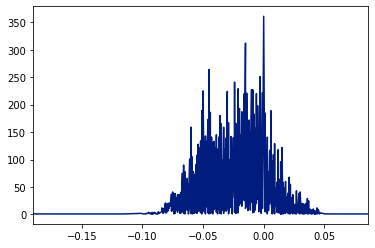

In [245]:
df.Dev_X.value_counts().sort_index().plot();


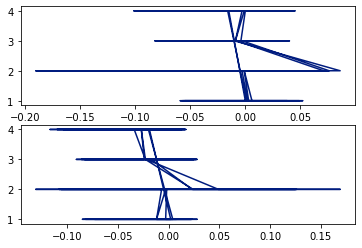

In [246]:
fig, axs = plt.subplots(2,1)

x = df.Dev_X;
y1 = df.HOLE_ID;
plt.axes(axs[0])
plt.plot(x,y1)

x = df.Dev_Y;
y2 = df.HOLE_ID;
plt.axes(axs[1])
plt.plot(x,y2)

plt.show()

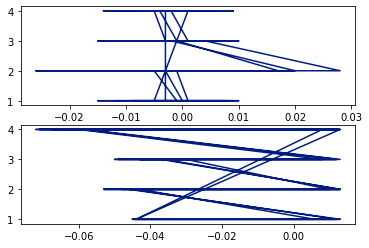

In [247]:
fig, axs = plt.subplots(2,1)

x = df.Dev_Z;
y3 = df.HOLE_ID;
plt.axes(axs[0])
plt.plot(x,y3)

x = df.Dev_D;
y4 = df.HOLE_ID;
plt.axes(axs[1])
plt.plot(x,y4)

In [248]:
df.head()

Tip_Dim               HIT_NO  HOLE_ID  TT_SCAN_TL DIR  ST_ANG  END_ANG  \
0  2mm_by_30mm  2.0-30_TH-1_1_TT_CW        1         1.1  CW     720        0   
1  2mm_by_30mm  2.0-30_TH-1_2_TT_CW        1         1.1  CW     720        0   
2  2mm_by_30mm  2.0-30_TH-1_3_TT_CW        1         1.1  CW     720        0   
3  2mm_by_30mm  2.0-30_TH-1_4_TT_CW        1         1.1  CW     720        0   
4  2mm_by_30mm  2.0-30_TH-1_5_TT_CW        1         1.1  CW     720        0   

   NUMHITS  Feat_X  Feat_Y  ...         j    k  Act_D   Act_X   Act_Y  Act_Z  \
0        7  -30.86  -15.35  ...  1.000000  0.0  2.544 -30.856 -16.607 -2.517   
1        7  -30.86  -15.35  ... -0.222521  0.0  2.544 -32.100 -15.071 -2.660   
2        7  -30.86  -15.35  ... -0.900969  0.0  2.544 -30.302 -14.168 -2.803   
3        7  -30.86  -15.35  ...  0.623490  0.0  2.544 -29.883 -16.134 -2.948   
4        7  -30.86  -15.35  ...  0.623490  0.0  2.544 -31.836 -16.121 -3.089   

   Dev_X  Dev_Y  Dev_Z  Dev_D  
0 -0.004  0.007  0.001 -0.044  
1  0.021 -0.001  0.001 -0.044  
2 -0.016 -0.056  0.001 -0.044  
3  0.000  0.005  0.003 -0.044  
4 -0.001 -0.008  0.002 -0.044  

[5 rows x 29 columns]

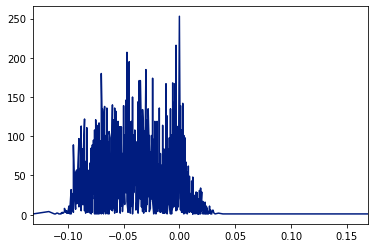

In [249]:
df.Dev_Y.value_counts().sort_index().plot();

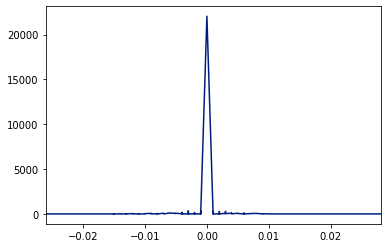

In [250]:
df.Dev_Z.value_counts().sort_index().plot();

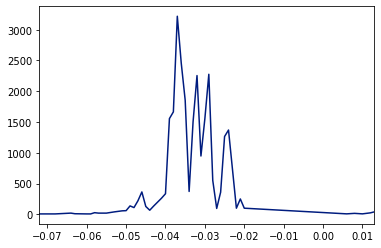

In [251]:
df.Dev_D.value_counts().sort_index().plot();

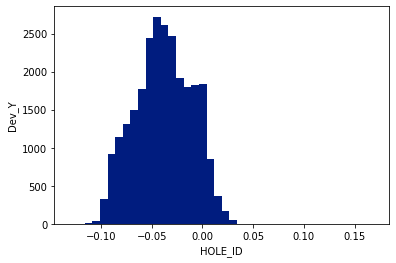

In [252]:
# Try more bins — it takes the range of the data and divides it into 20 evenly spaced bins.
df.Dev_Y.plot(kind='hist', bins=40);
plt.xlabel('HOLE_ID');
plt.ylabel('Dev_Y');

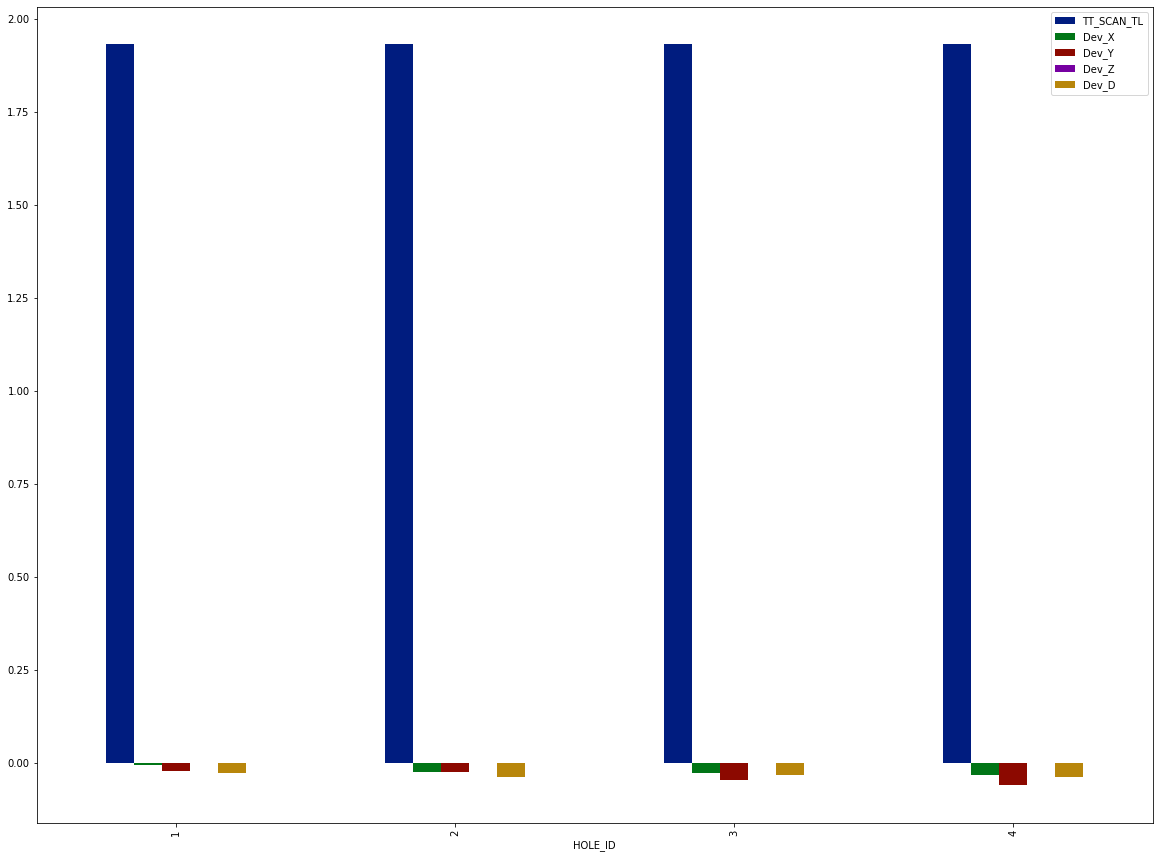

In [253]:
# Side-by-side bar plots
df_new = df[['TT_SCAN_TL','HOLE_ID', 'Dev_X','Dev_Y','Dev_Z','Dev_D']] 
df_new[df_new['Dev_X']<0.13].groupby('HOLE_ID').mean().plot(kind='bar', figsize=(20, 15));

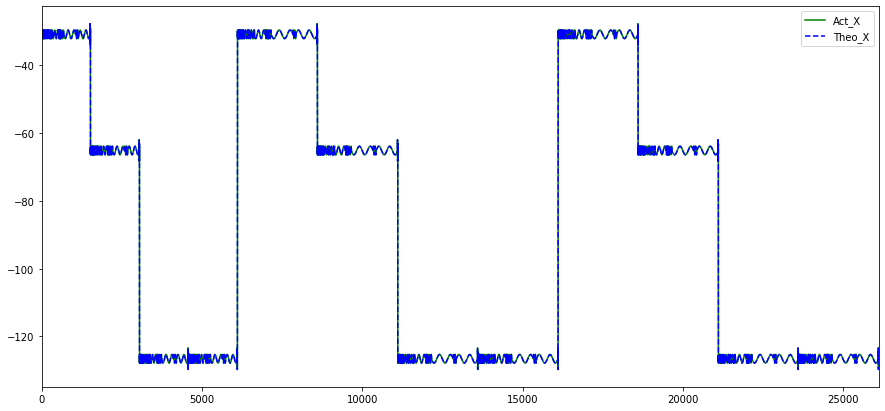

In [254]:
df[['Act_X', 'Theo_X']].plot(figsize=(15,7), style={'Act_X': '-g', 'Theo_X': '--b'});

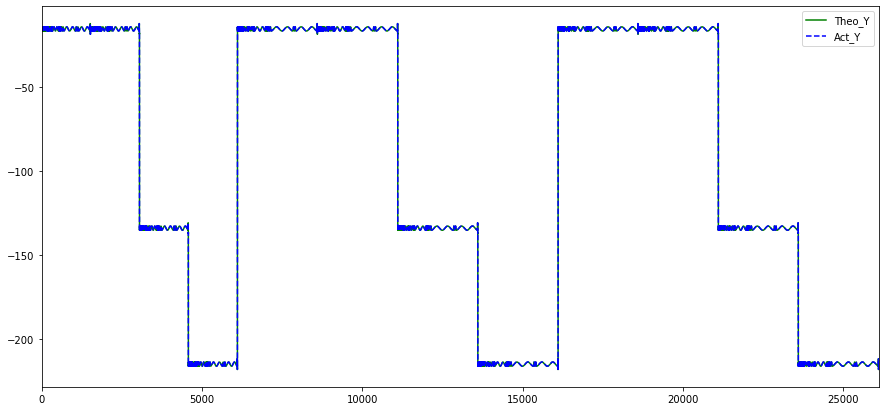

In [255]:
df[['Theo_Y', 'Act_Y']].plot(figsize=(15,7), style={'Theo_Y': '-g', 'Act_Y': '--b'});

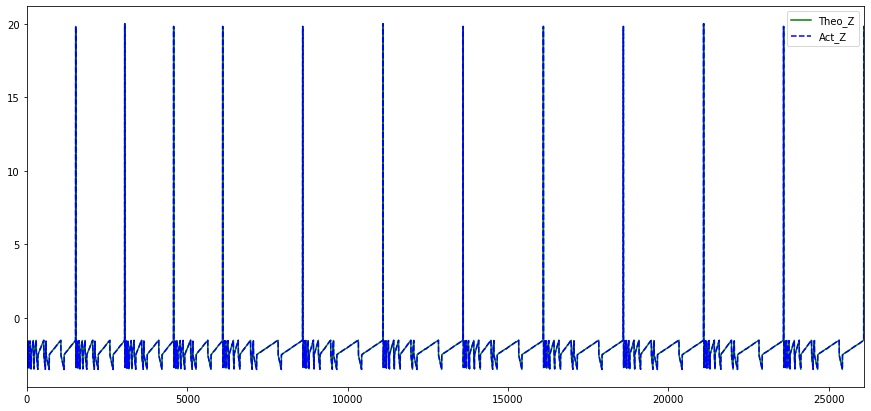

In [256]:
df[['Theo_Z', 'Act_Z']].plot(figsize=(15,7), style={'Theo_Z': '-g', 'Act_Z': '--b'});

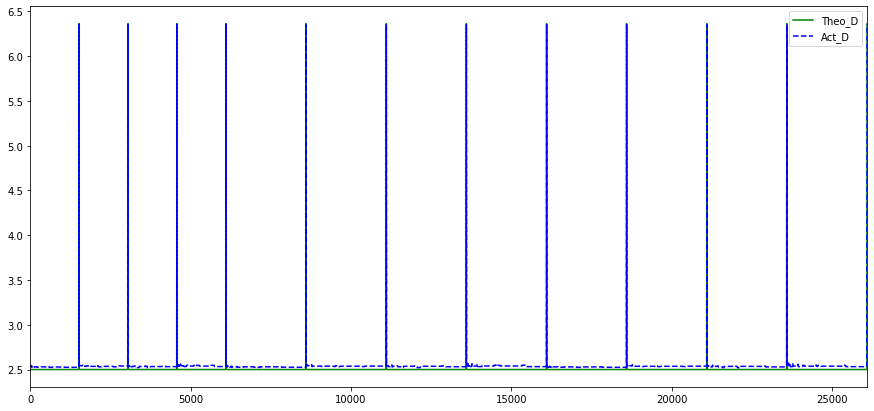

In [257]:
df[['Theo_D', 'Act_D']].plot(figsize=(15,7), style={'Theo_D': '-g', 'Act_D': '--b'});

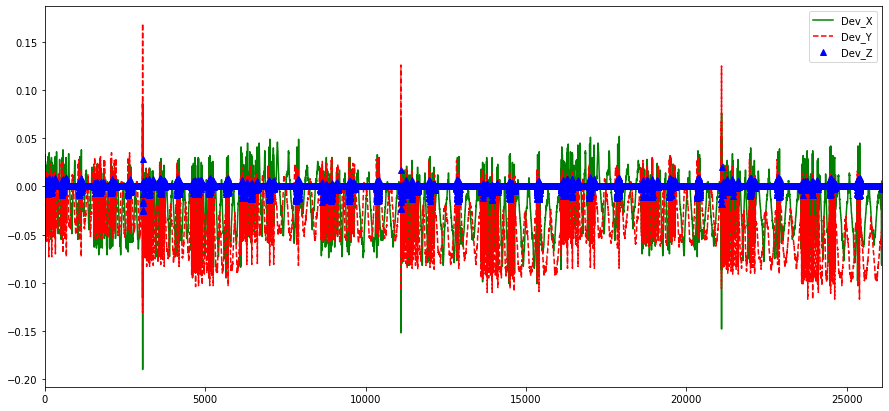

In [258]:
df[['Dev_X', 'Dev_Y', 'Dev_Z']].plot(figsize=(15,7), style={'Dev_X': '-g', 'Dev_Y': '--r','Dev_Z': '^ b' });

# Experiments and Hypothesis Testing

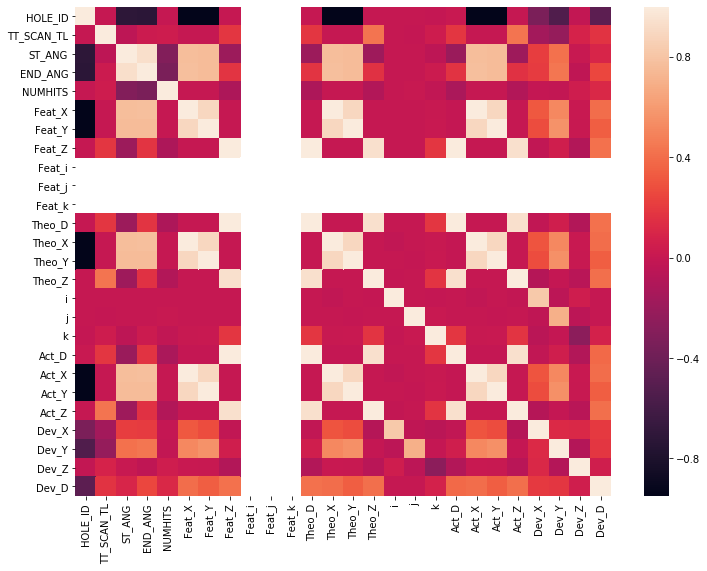

In [260]:
plt.figure(figsize=(12, 9))
sns.heatmap(df.corr()) 

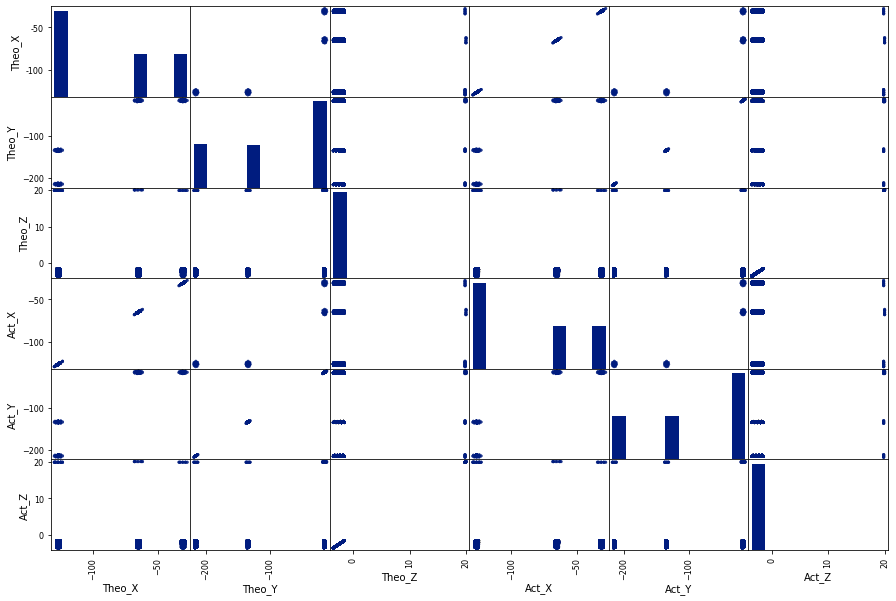

In [259]:
# Scatter matrix of six numerical columns
pd.plotting.scatter_matrix(df[['Theo_X', 'Theo_Y', 'Theo_Z', 'Act_X', 'Act_Y', 'Act_Z']], figsize=(15, 10));

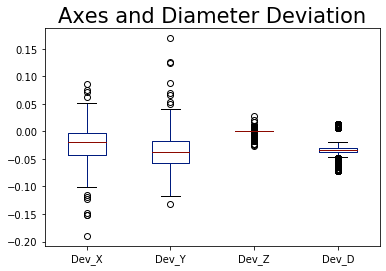

In [261]:
ax = df[['Dev_X', 'Dev_Y', 'Dev_Z', 'Dev_D']].plot(kind='box')
# Set the title.
ax.set_title('Axes and Diameter Deviation', fontsize=21, y=1);

No handles with labels found to put in legend.


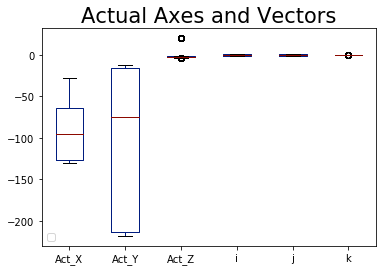

In [263]:
ax = df[['Act_X', 'Act_Y', 'Act_Z', 'i', 'j', 'k']].plot(kind='box')
# Set the title.
ax.set_title('Actual Axes and Vectors', fontsize=21, y=1);

# Move the legend.
ax.legend(loc=3);

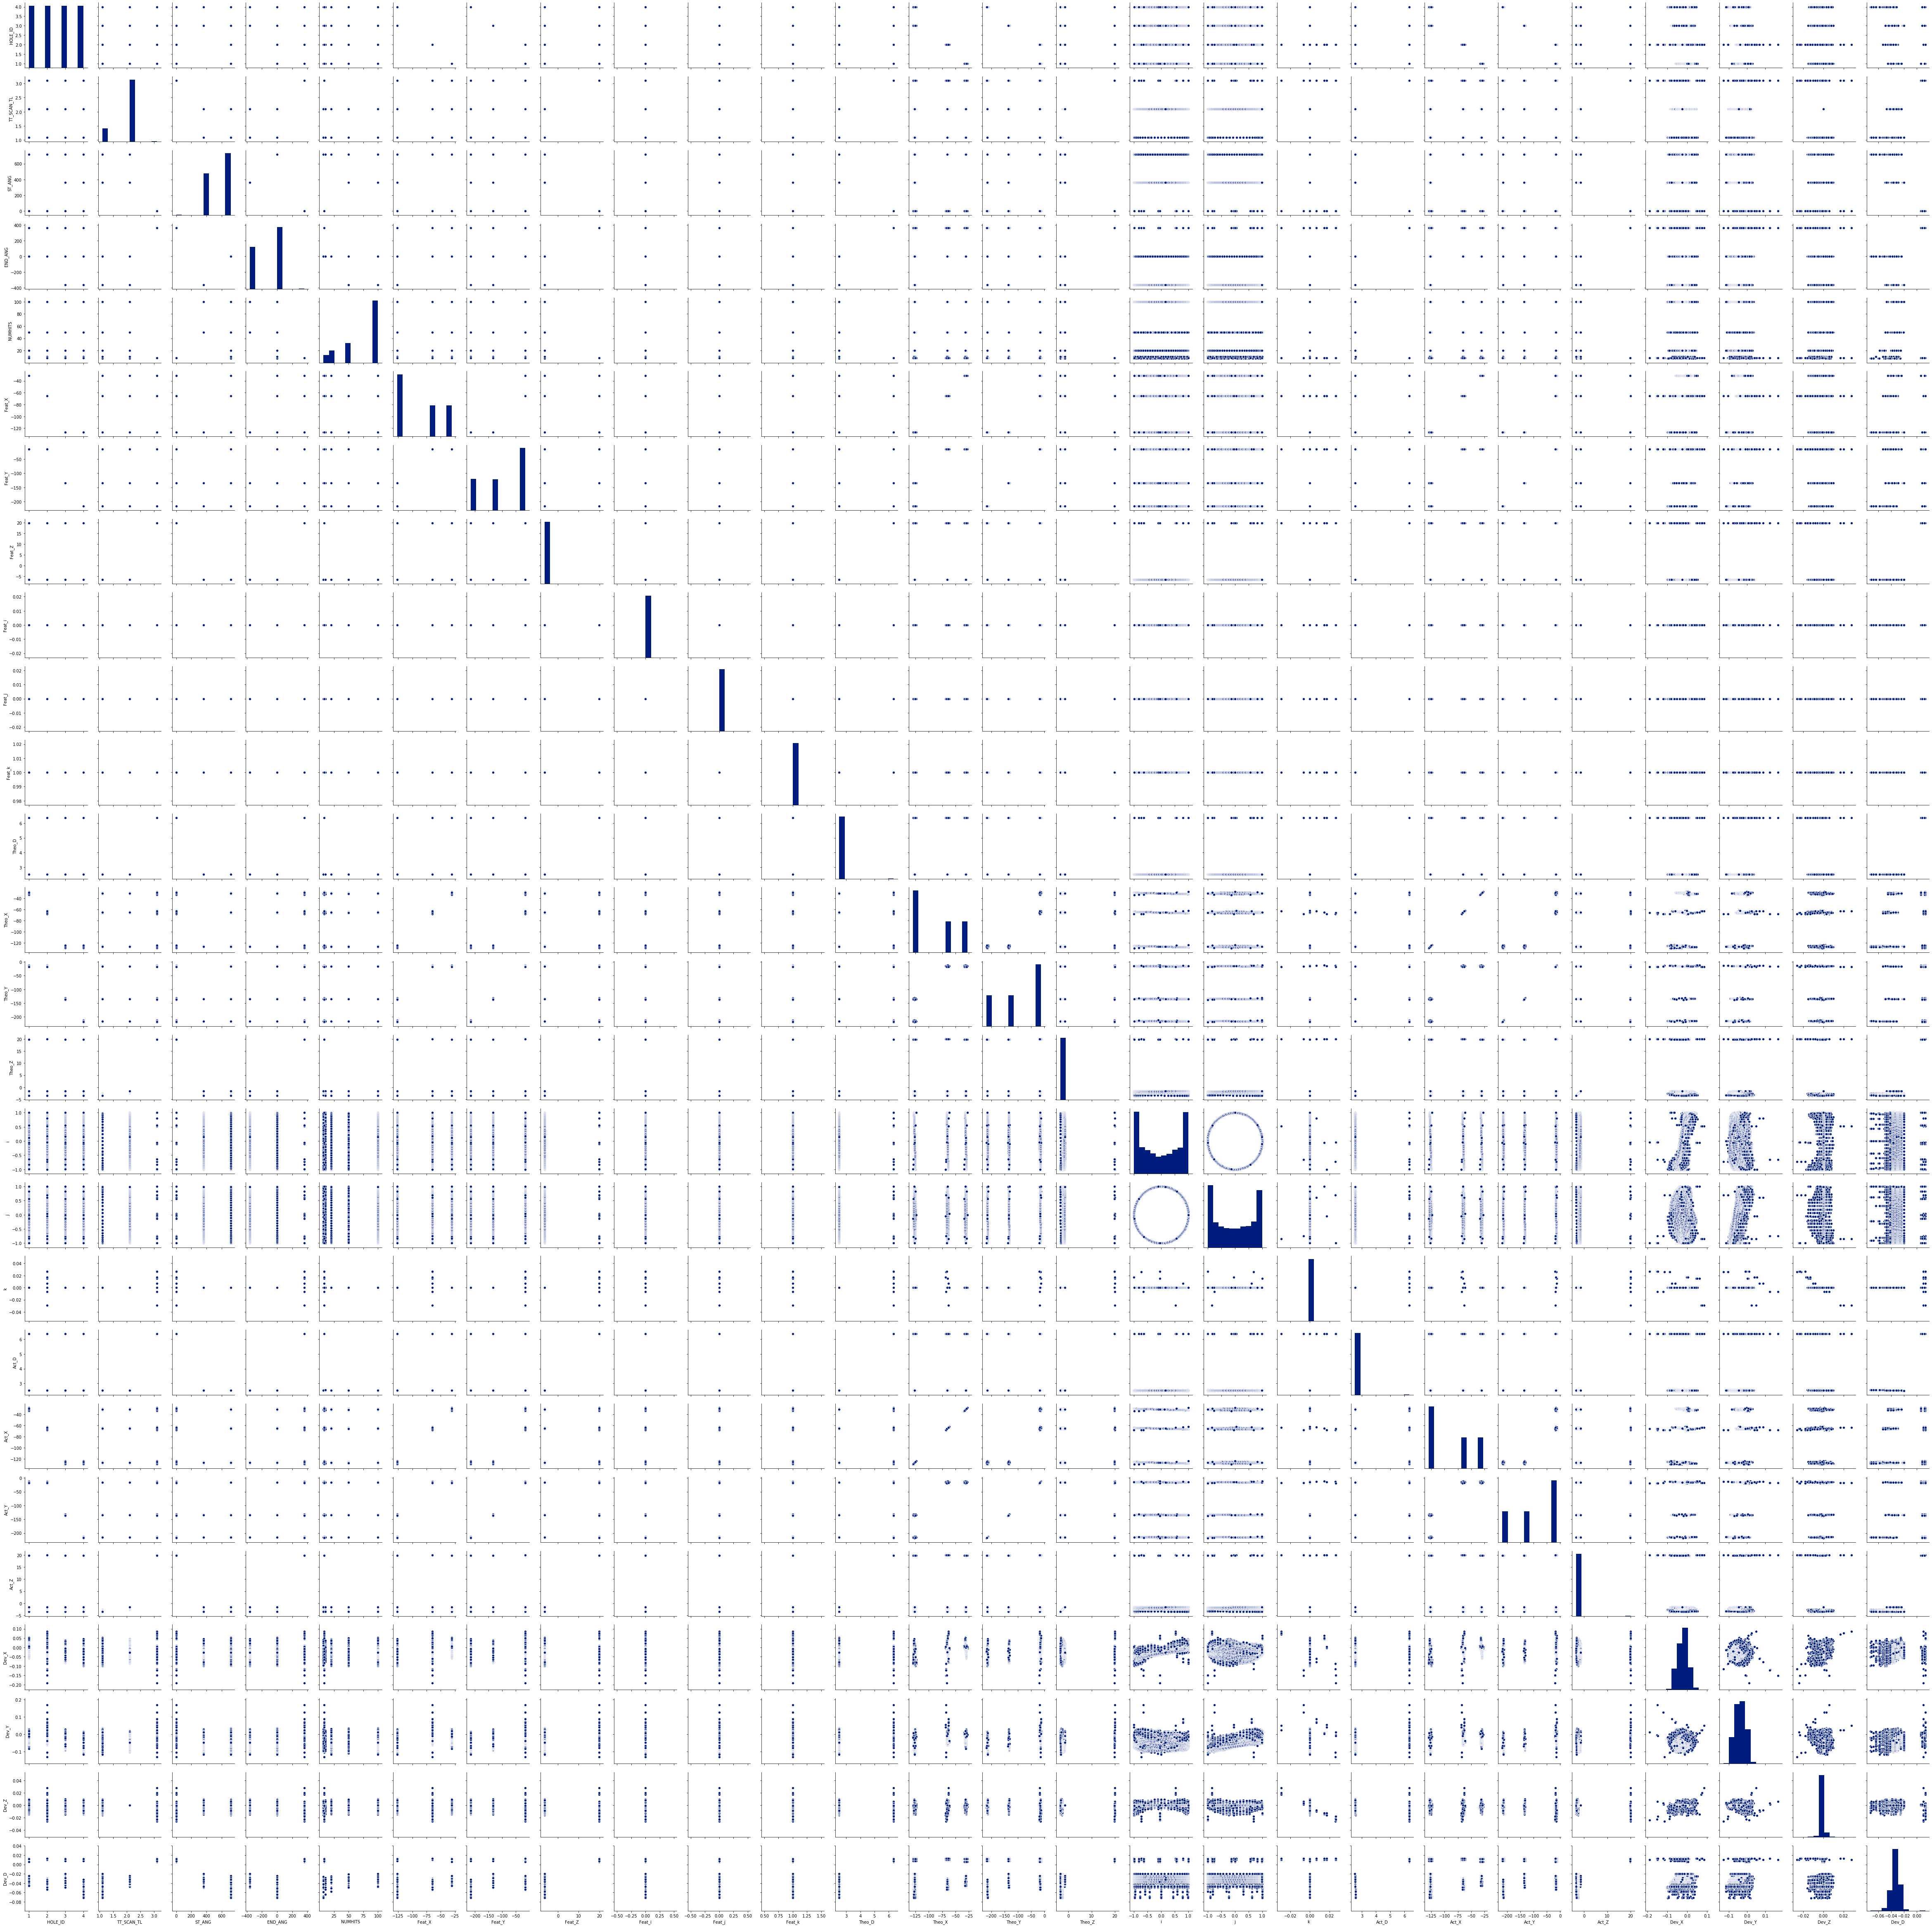

In [264]:
sns.pairplot(df);

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000184F0BAF0F0>,
      dtype=object)

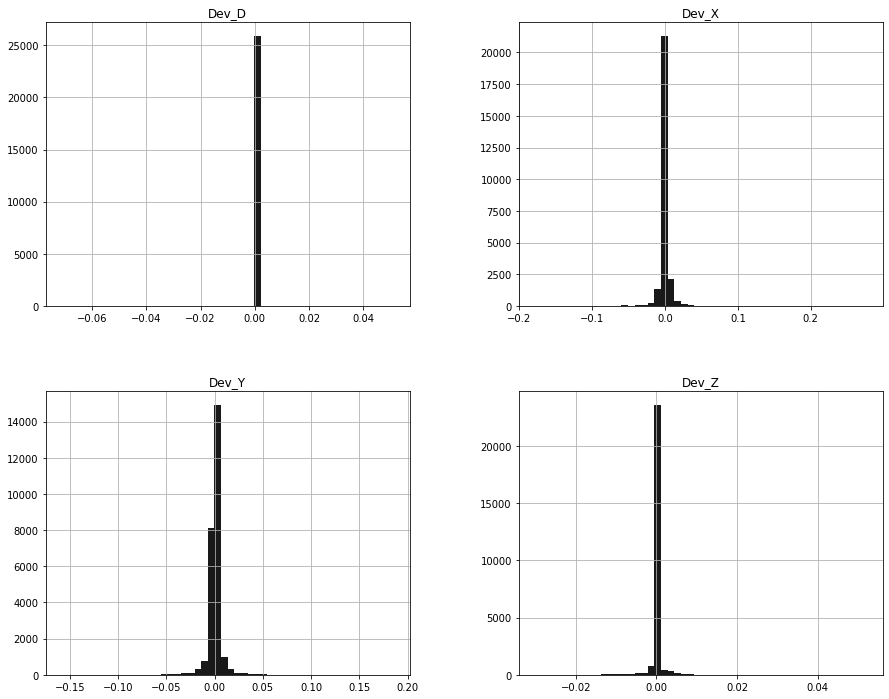

In [265]:
df_new_two = df[['Dev_X','Dev_Y','Dev_Z','Dev_D']] 

df_new_two.diff().hist(color='k', alpha=0.9, bins=50, figsize=(15,12))

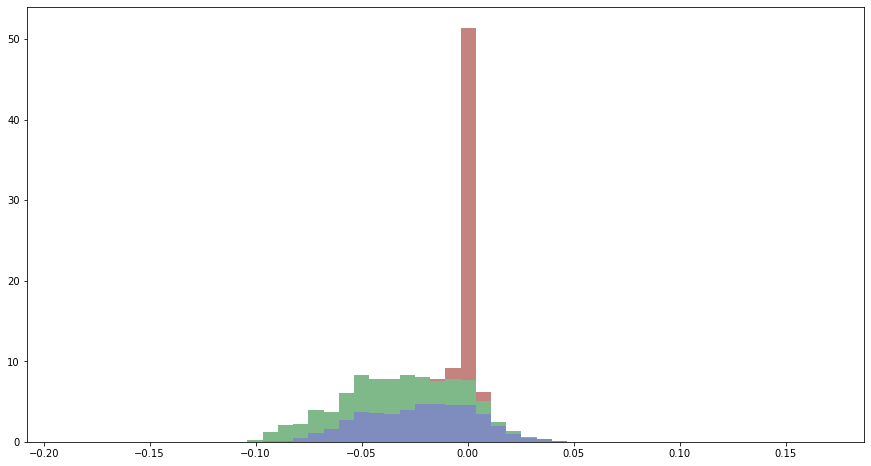

In [266]:
###As three separate arrays
x1 = df.Dev_X
x2 = df.Dev_Y
x3 = df.Dev_Z

#Stack the data
plt.figure(figsize=(15,8))
plt.hist([x1,x2,x3],alpha=0.5, bins=50, stacked=True, density=True)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000184FD601FD0>,
      dtype=object)

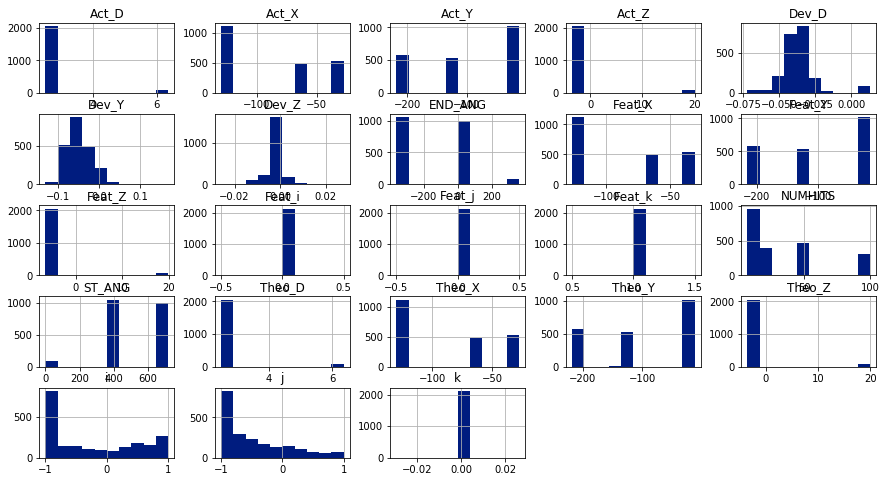

In [267]:
m=df.groupby(['HOLE_ID', 'TT_SCAN_TL', 'Dev_X']).min()
m.hist(stacked=True, figsize=(15,8))

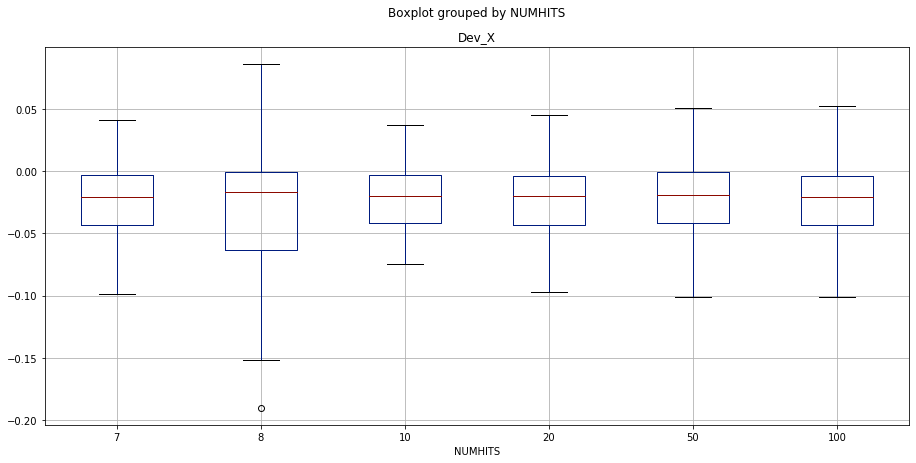

In [268]:
df.boxplot(column='Dev_X', by='NUMHITS', figsize=(15,7))

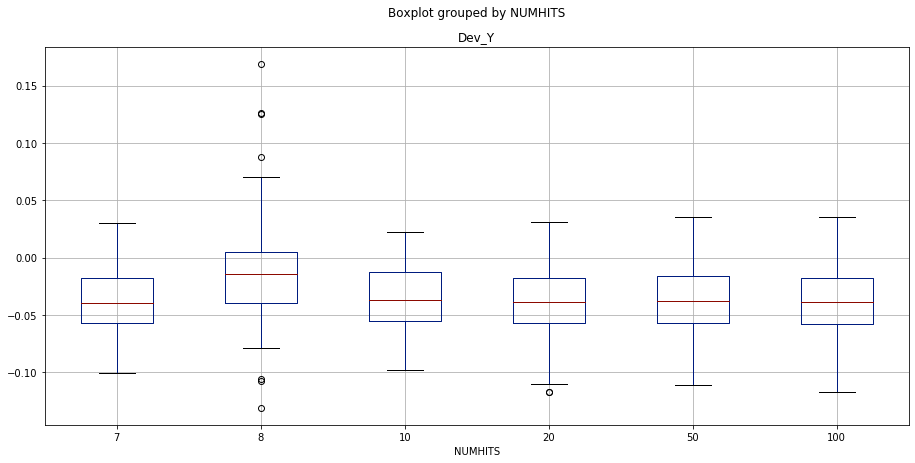

In [269]:
df.boxplot(column='Dev_Y', by='NUMHITS', figsize=(15,7))

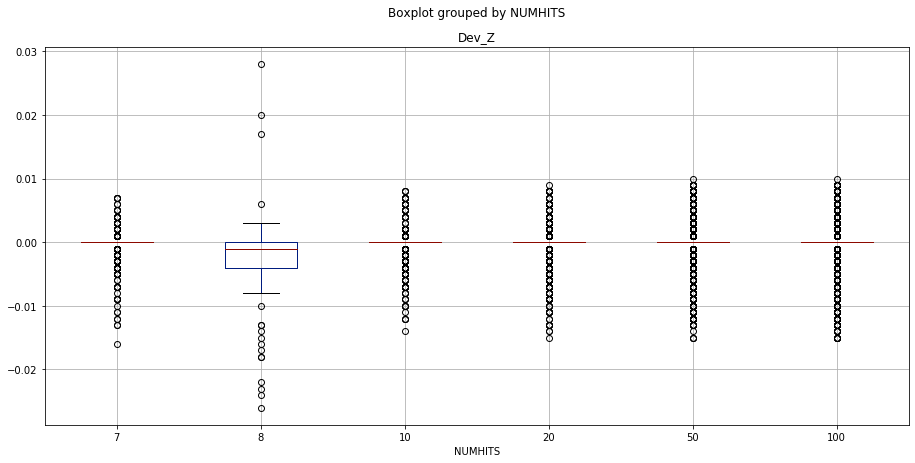

In [270]:
df.boxplot(column='Dev_Z', by='NUMHITS', figsize=(15,7))

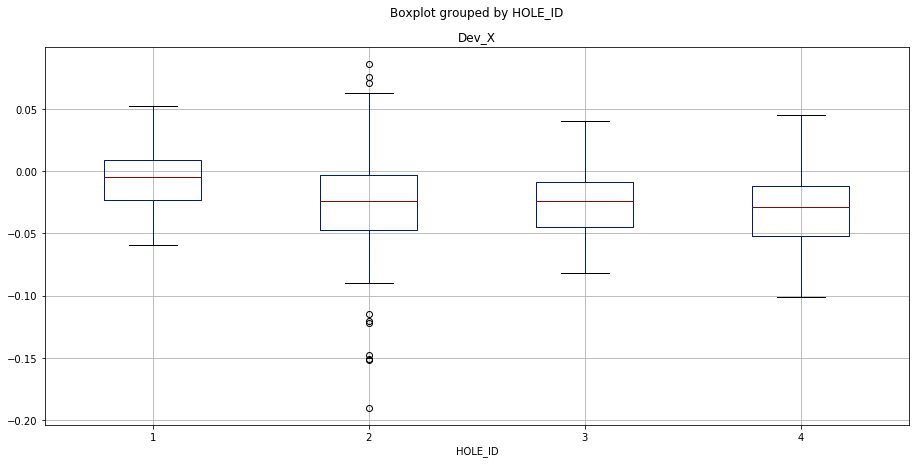

In [271]:
df.boxplot(column='Dev_X', by='HOLE_ID', figsize=(15,7))

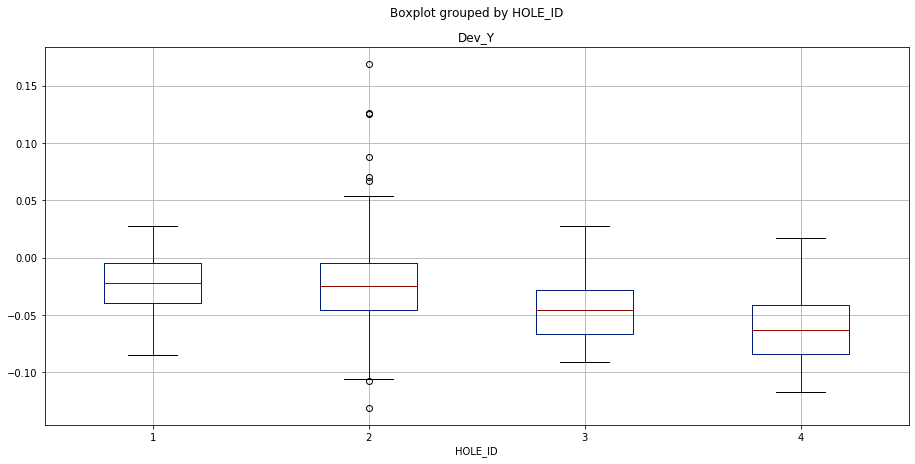

In [272]:
df.boxplot(column='Dev_Y', by='HOLE_ID', figsize=(15,7))

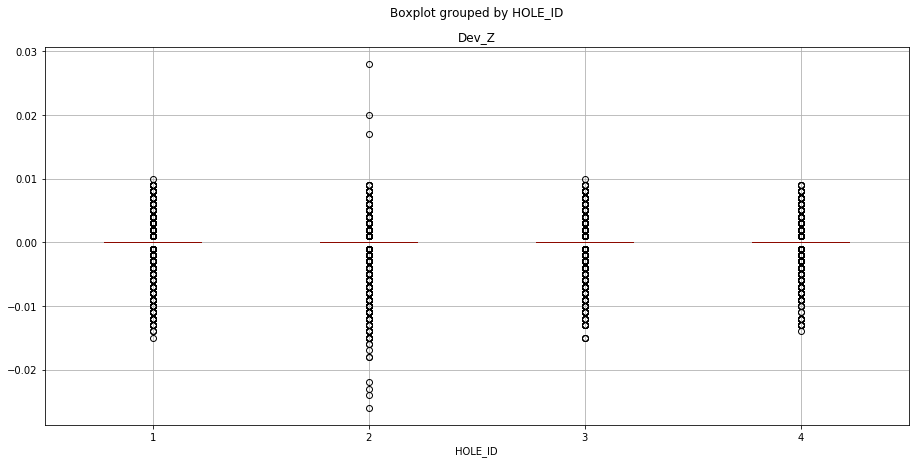

In [273]:
df.boxplot(column='Dev_Z', by='HOLE_ID', figsize=(15,7))

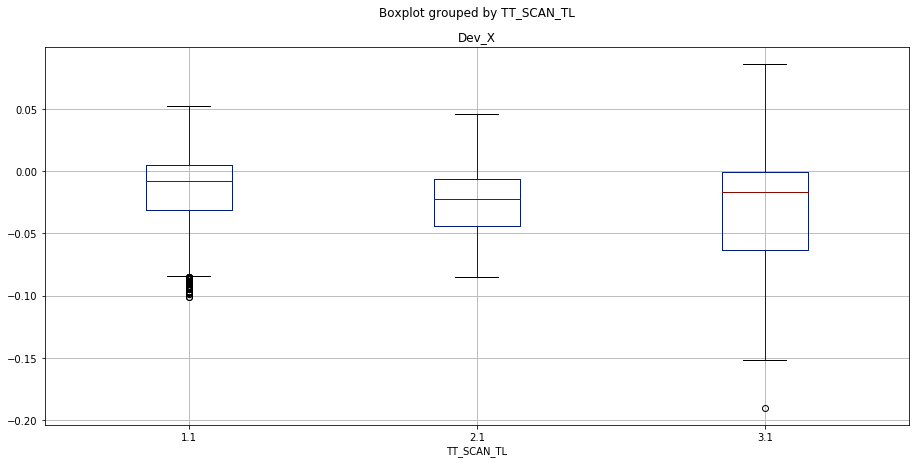

In [274]:
df.boxplot(column='Dev_X', by='TT_SCAN_TL', figsize=(15,7))

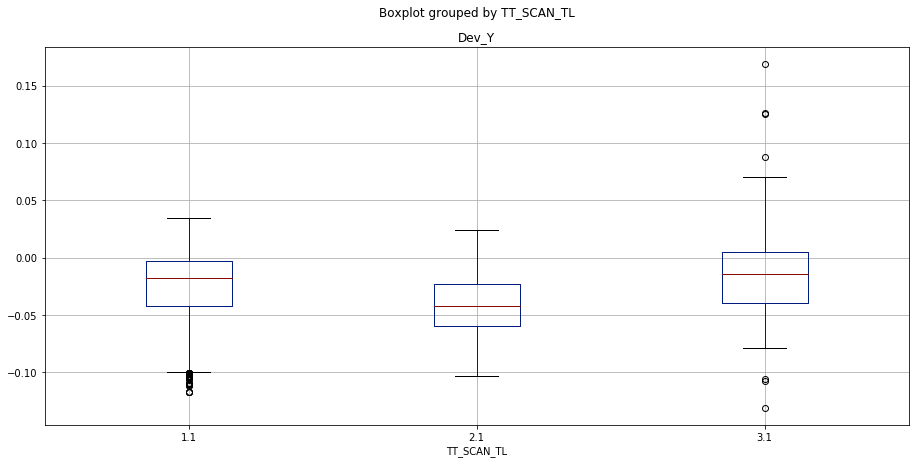

In [275]:
df.boxplot(column='Dev_Y', by='TT_SCAN_TL', figsize=(15,7))

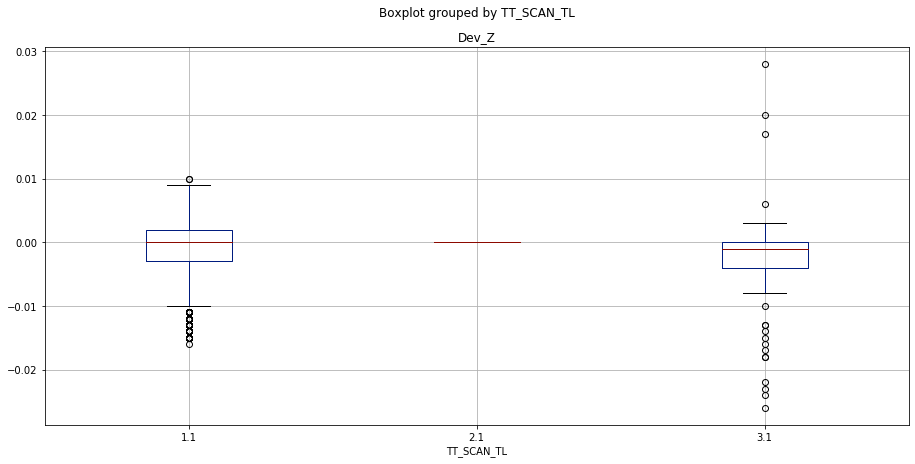

In [276]:
df.boxplot(column='Dev_Z', by='TT_SCAN_TL', figsize=(15,7))

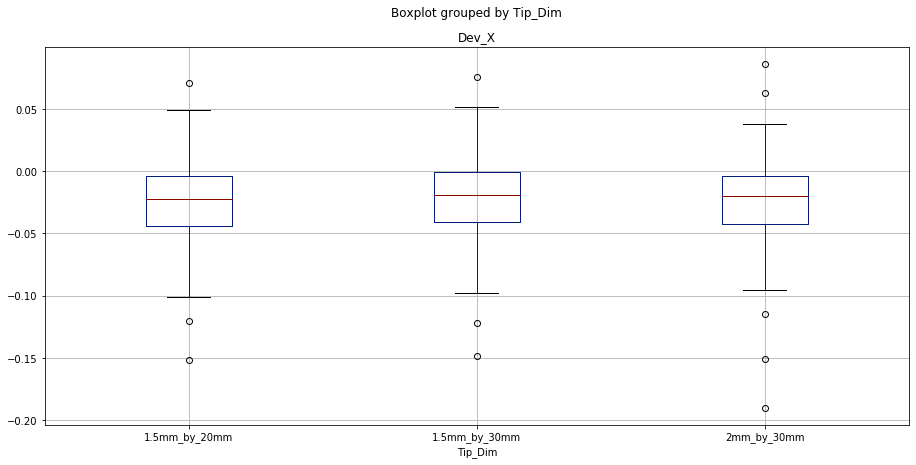

In [277]:
df.boxplot(column='Dev_X', by='Tip_Dim', figsize=(15,7))

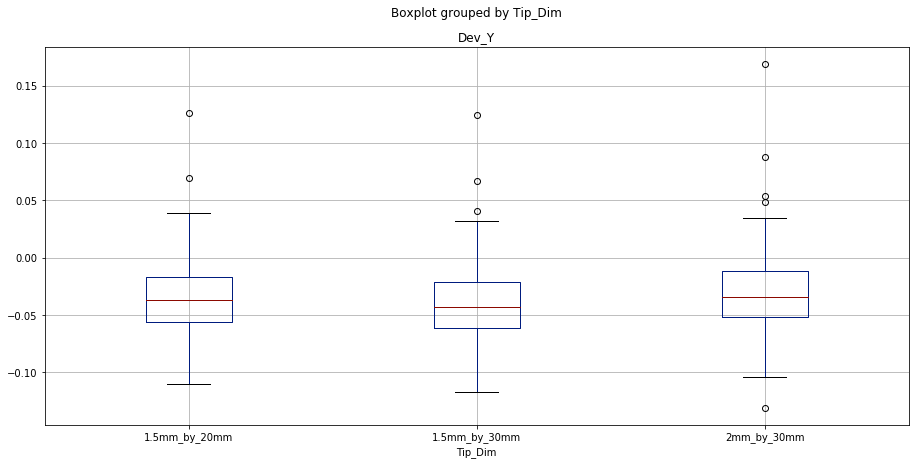

In [278]:
df.boxplot(column='Dev_Y', by='Tip_Dim', figsize=(15,7))

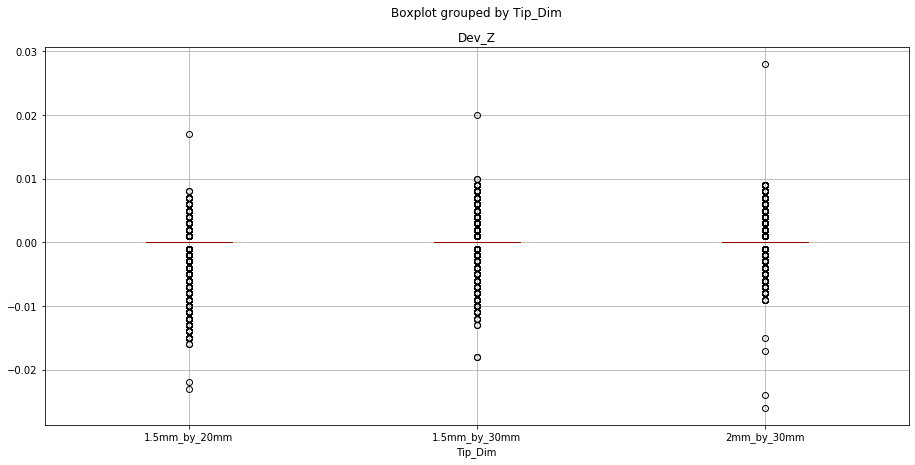

In [279]:
df.boxplot(column='Dev_Z', by='Tip_Dim', figsize=(15,7))

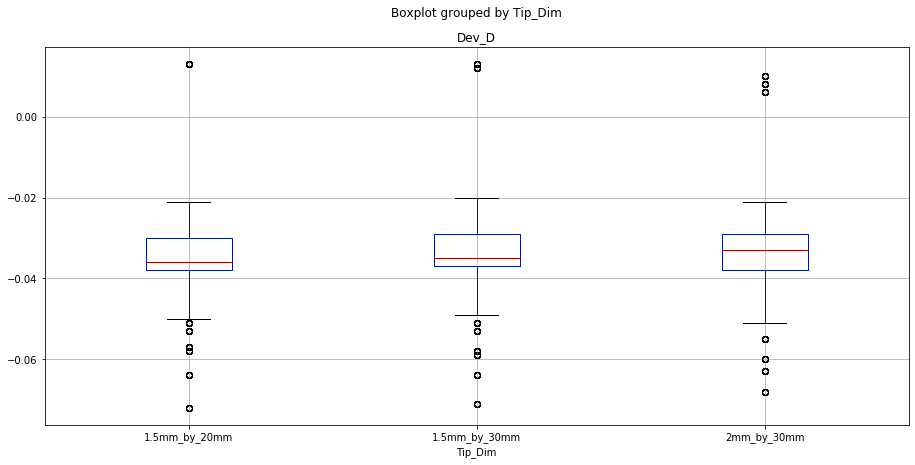

In [280]:
df.boxplot(column='Dev_D', by='Tip_Dim', figsize=(15,7))

# Modeling
[Modeling Part](04.Final_Project_Part-3.ipynb#section_id2)